<a href="https://colab.research.google.com/github/tasinfrancesco/Practical_ML_PSL/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

torch.manual_seed(42)
np.random.seed(42)

print("imports ok")

df = pd.read_csv("Fraud_detection.csv")
print(df.describe())
print(df.head())
df["target"].value_counts()


imports ok
                  V1             V2             V3             V4  \
count  164492.000000  164492.000000  164492.000000  164492.000000   
mean       -0.008433       0.003690      -0.007025       0.004593   
std         1.974126       1.657336       1.553115       1.426890   
min       -40.470142     -60.464618     -48.325589      -5.683171   
25%        -0.923587      -0.601996      -0.892095      -0.849040   
50%         0.014067       0.066404       0.179676      -0.019323   
75%         1.313740       0.805330       1.024761       0.743670   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  164492.000000  164492.000000  164492.000000  164492.000000   
mean       -0.005055      -0.007458      -0.007589       0.000740   
std         1.405771       1.334891       1.292160       1.223473   
min      -113.743307     -23.496714     -43.557242     -73.216718   
25%        -0.696823  

target
0    162391
1      2101
Name: count, dtype: int64

(131593, 29) (32899, 29) (131593,) (32899,)


/tmp/ipython-input-3487118249.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


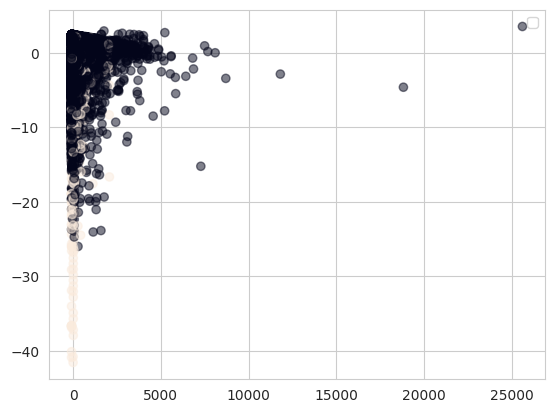

In [ ]:

pca = PCA(n_components = 2, random_state = 42)
z_pca = pca.fit_transform(X_train)

plt.scatter(z_pca[:, 0], z_pca[:, 1], c = y_train, alpha = .5)
plt.legend()
plt.show()

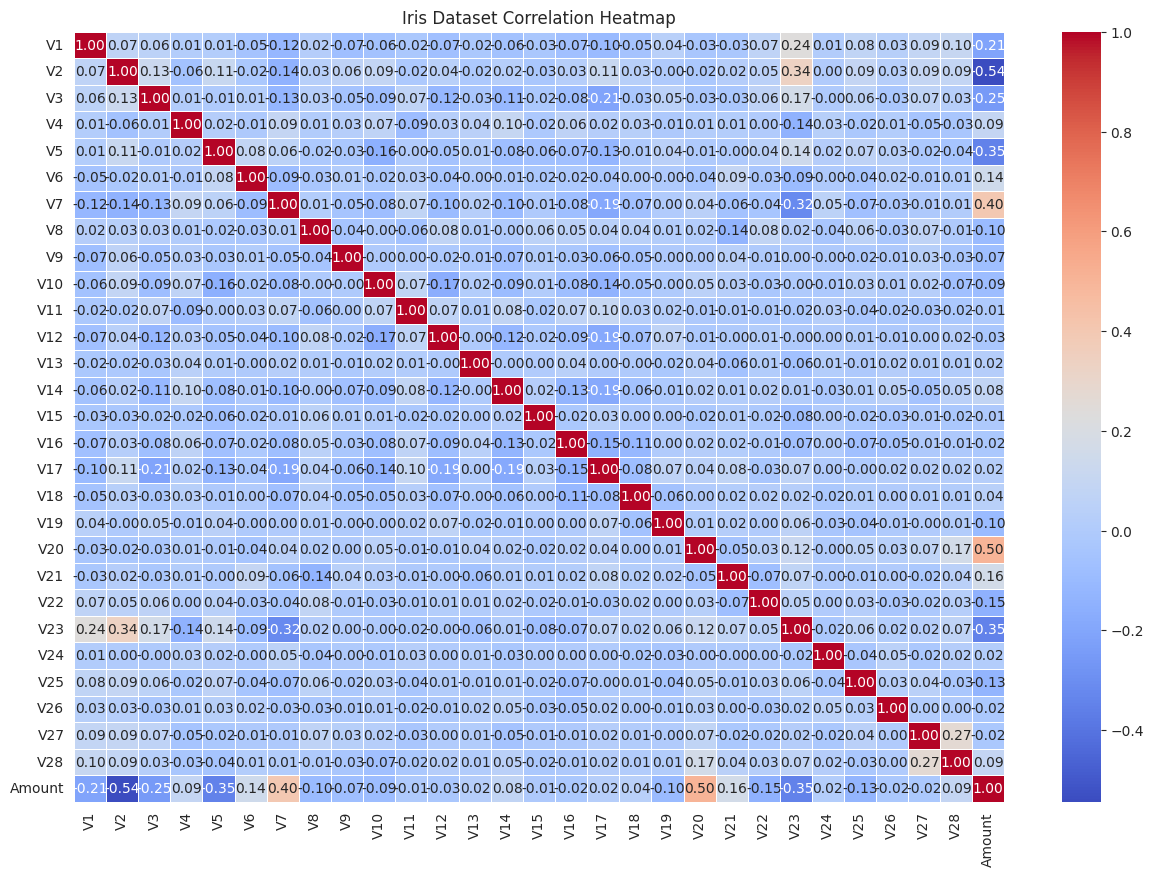

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style(style="whitegrid")

# X = df.drop(columns=["target"])
# pd.plotting.scatter_matrix(X, figsize=(12, 6), alpha=0.3)
# plt.show()

corr_mat = X.corr()
plt.figure(figsize=[15, 10])
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Iris Dataset Correlation Heatmap")
plt.show()

[524.21697671]


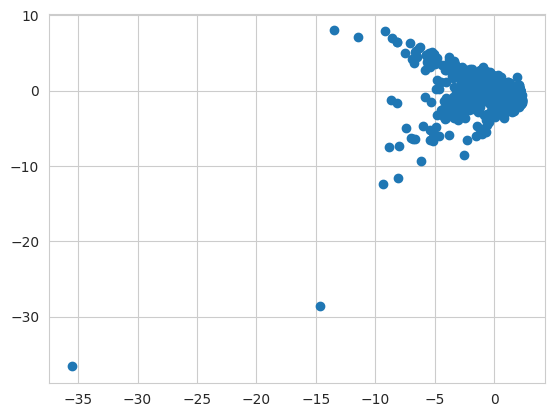

[346.89438532]


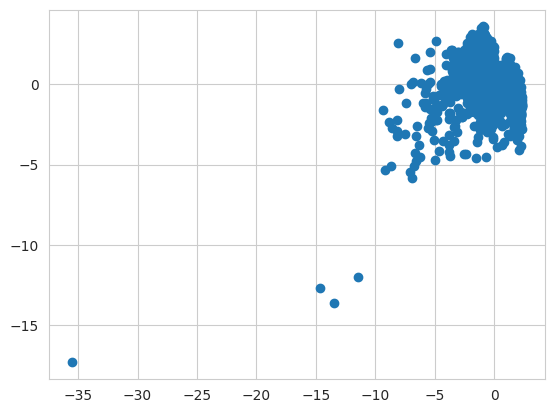

[69.3410424]


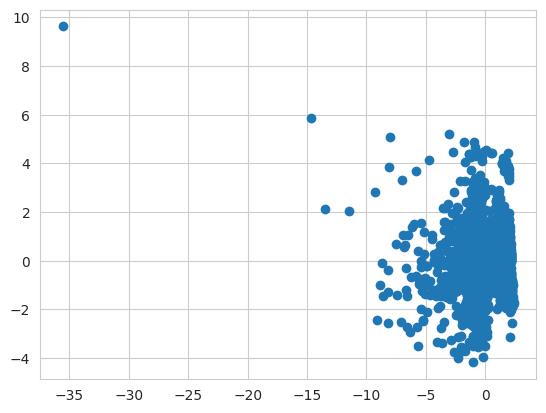

[61.60239484]


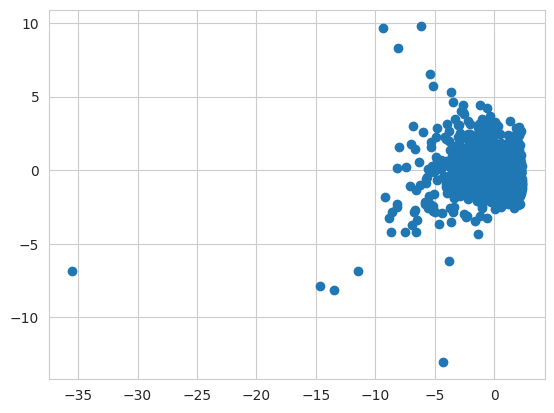

[-265.92439321]


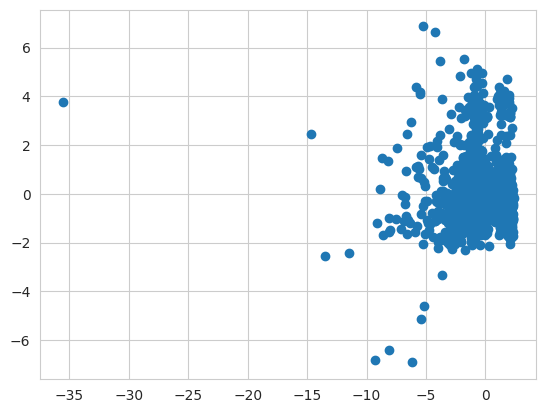

[-532.17996432]


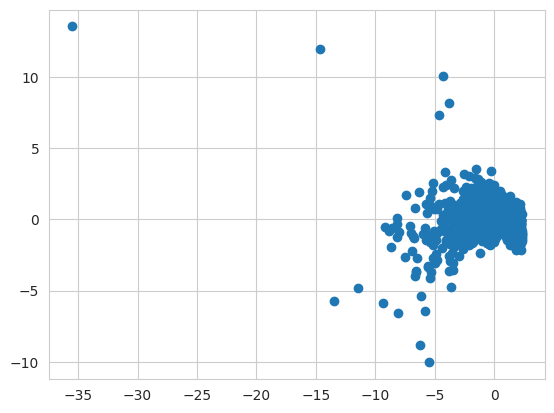

[118.1387871]


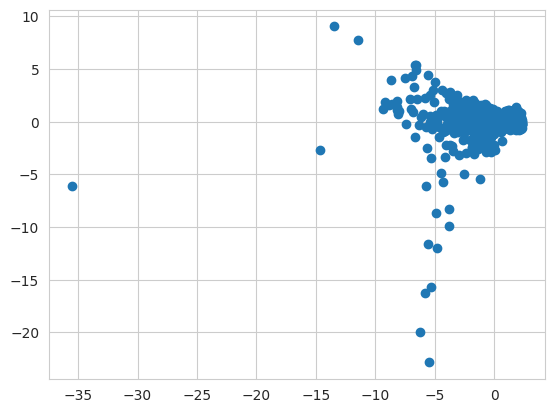

[-335.129825]


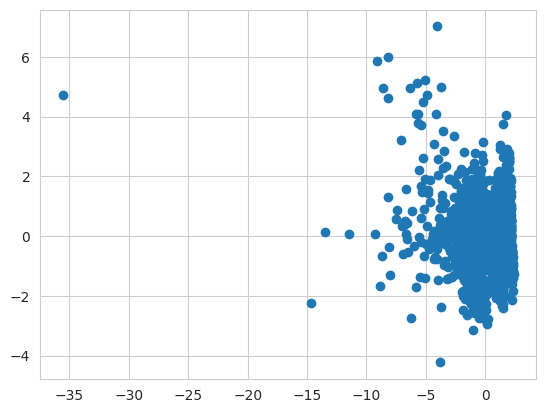

[-266.48109096]


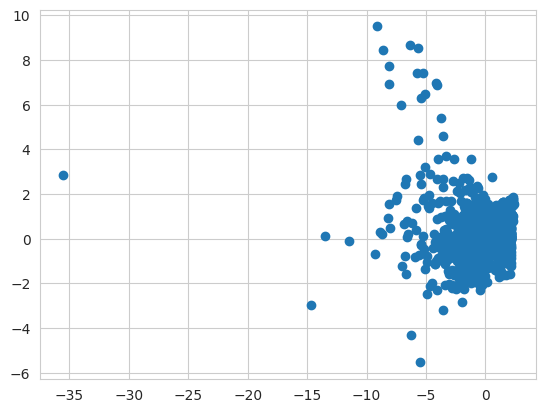

[-85.89768458]


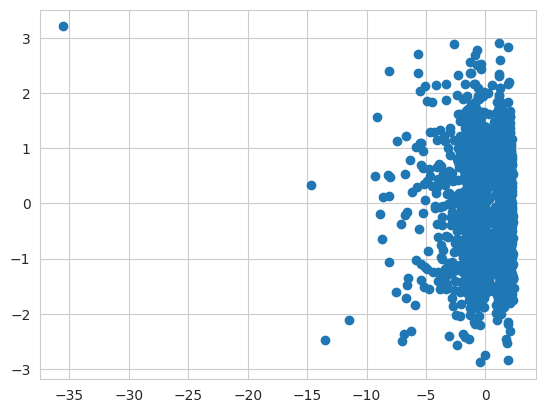

[-271.39939249]


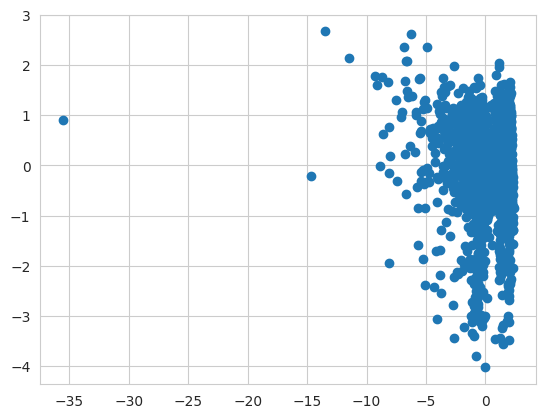

[-84.57339603]


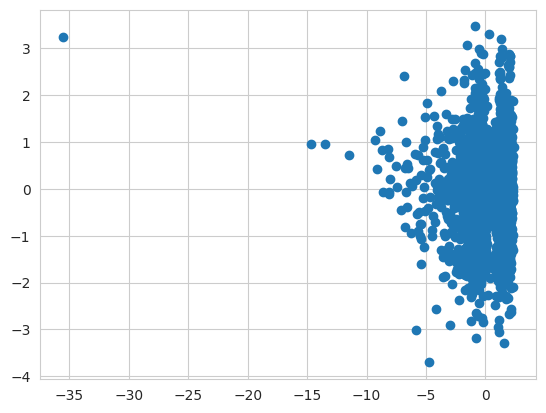

[-218.28595824]


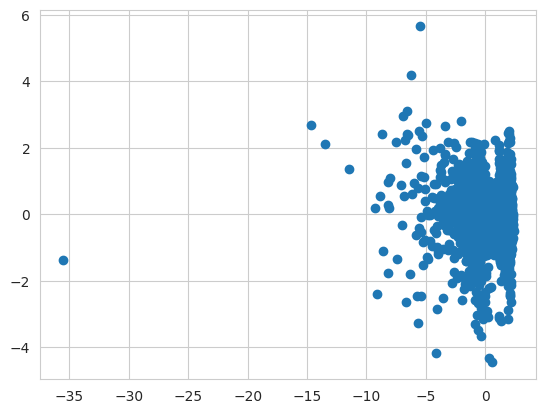

[-115.08457582]


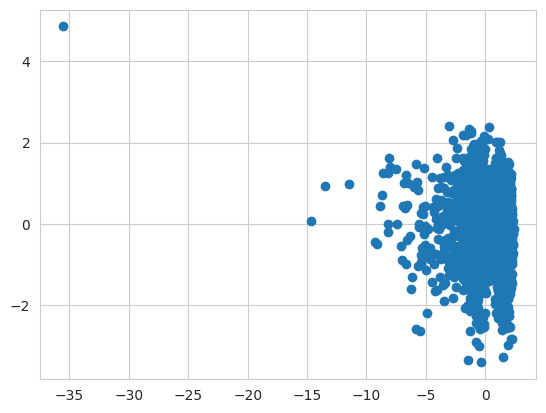

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[524.21697671]


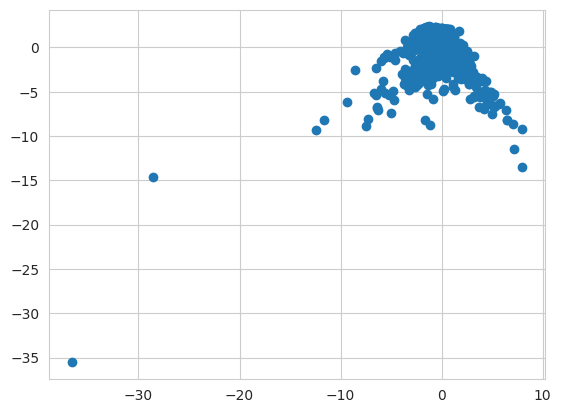

[703.36303466]


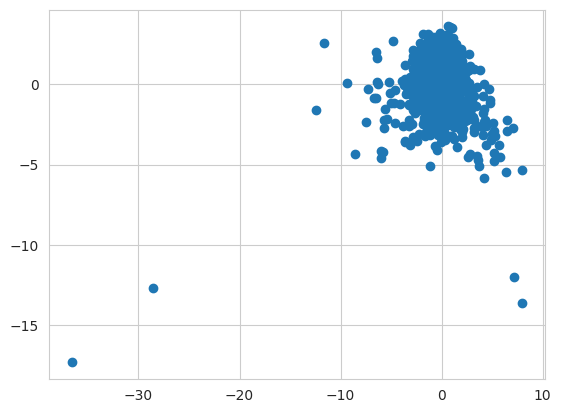

[-287.44958194]


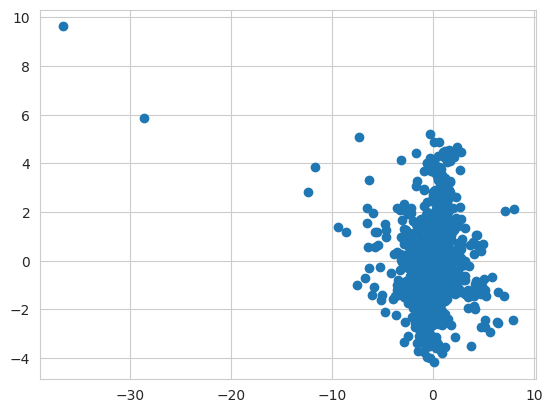

[517.38593432]


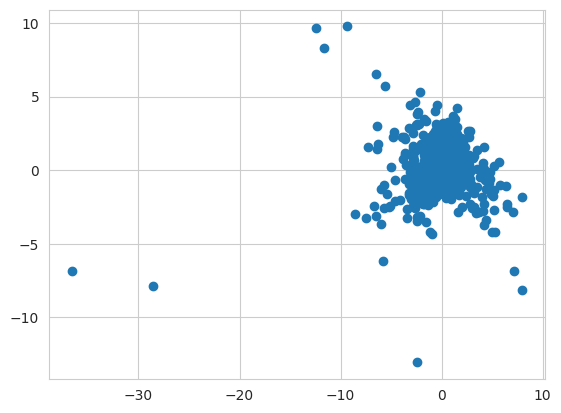

[-97.083105]


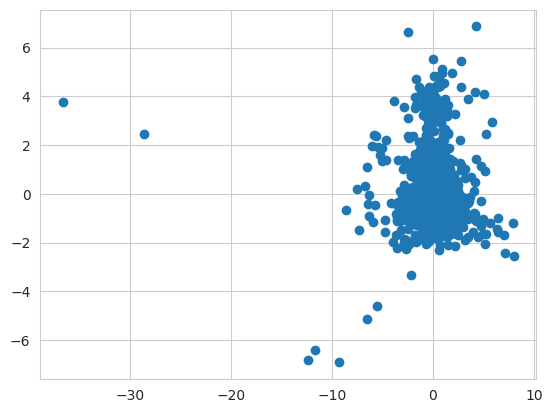

[-571.91310781]


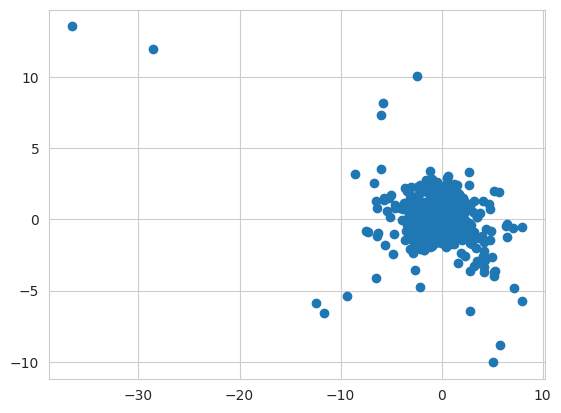

[147.12393609]


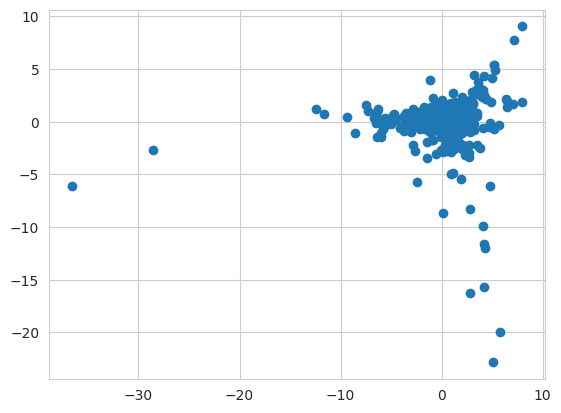

[256.12345219]


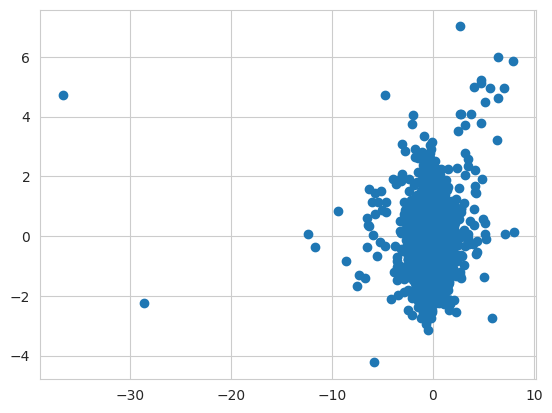

[339.91707395]


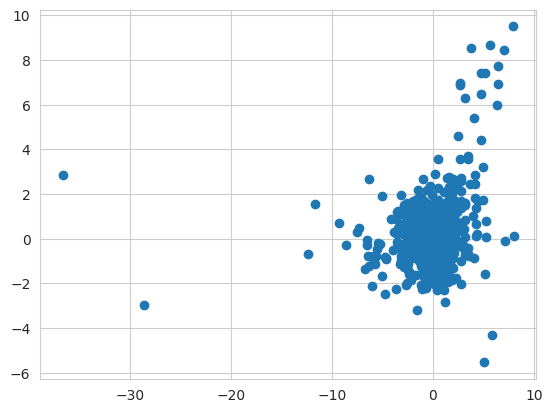

[-62.60098342]


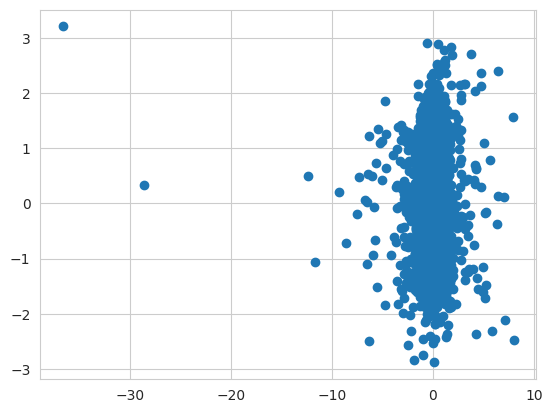

[135.85494867]


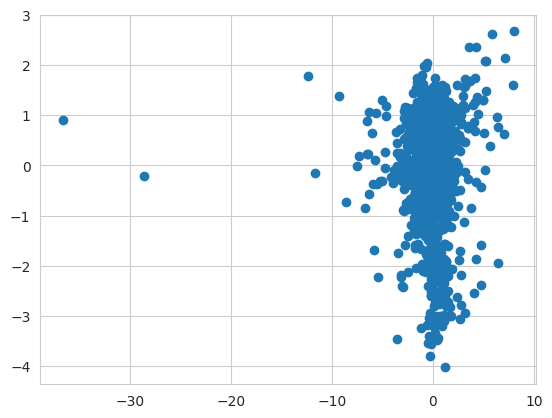

[-60.04043083]


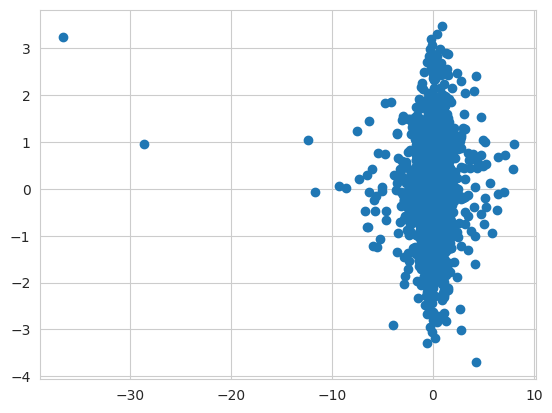

[76.71326167]


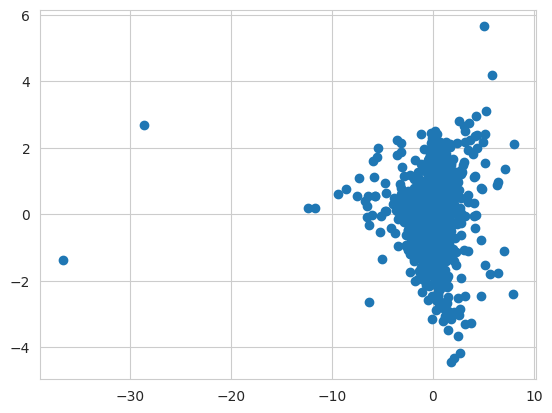

[-96.19909675]


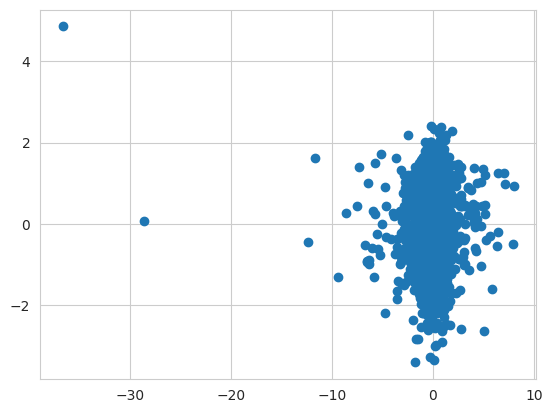

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[346.89438532]


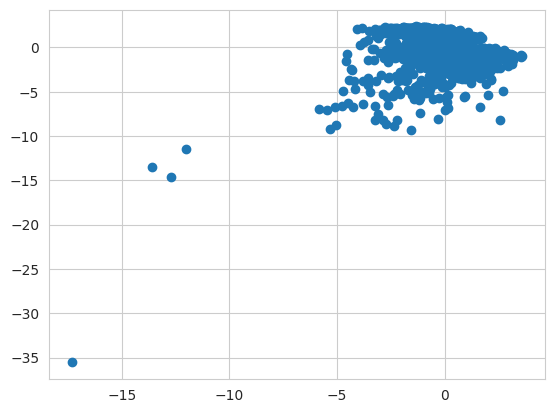

[703.36303466]


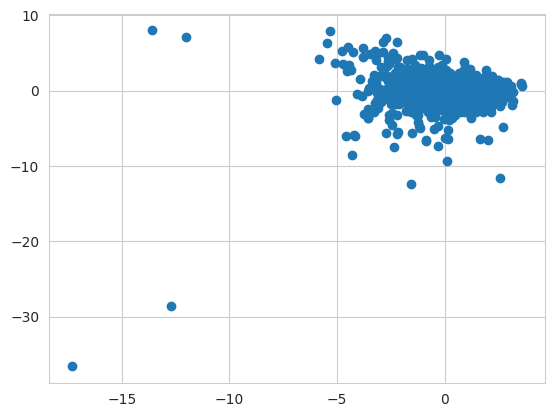

[43.92369477]


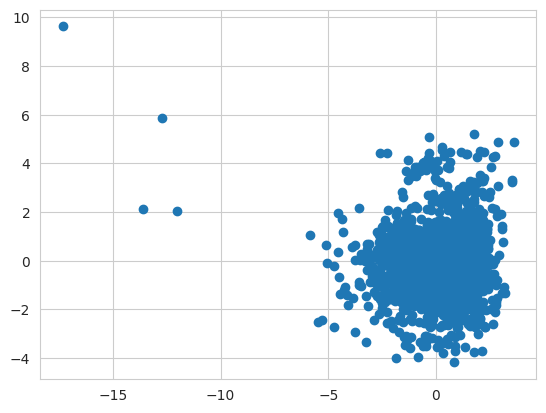

[-25.41927298]


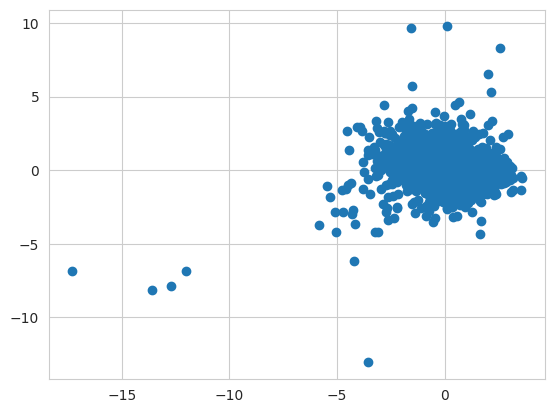

[57.62217689]


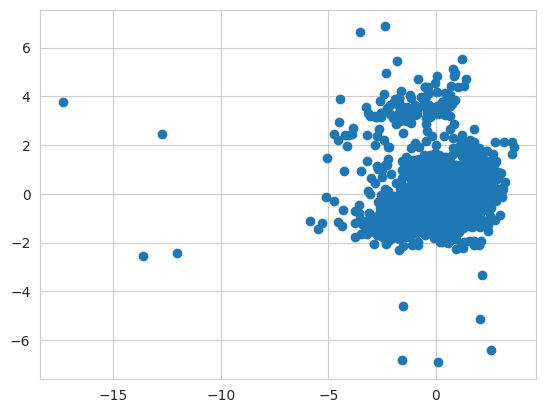

[-432.83453685]


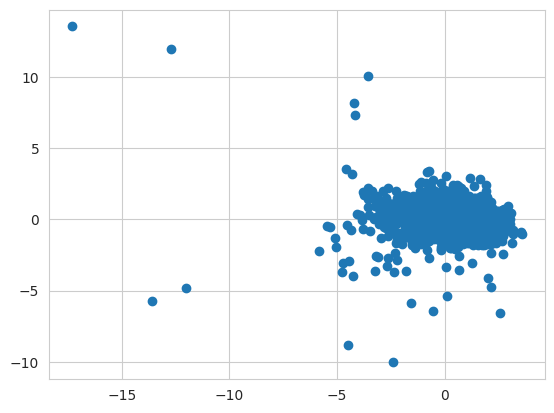

[98.36325328]


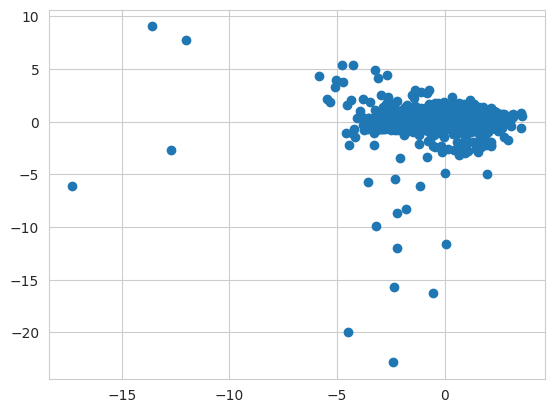

[-176.64436986]


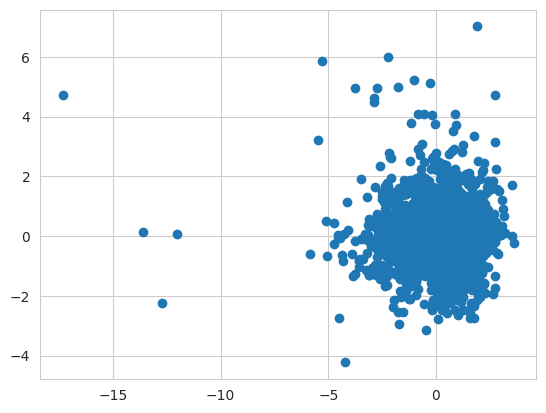

[-283.05593067]


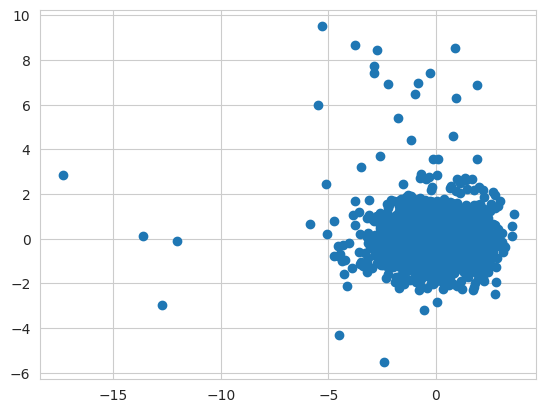

[208.54293549]


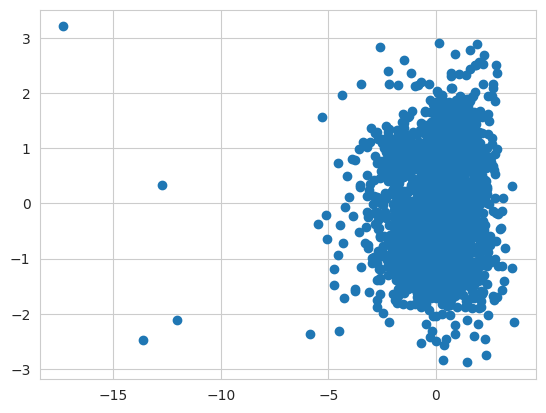

[-338.47071016]


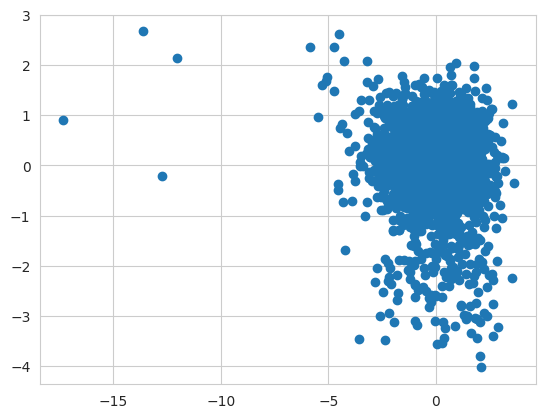

[-105.68578028]


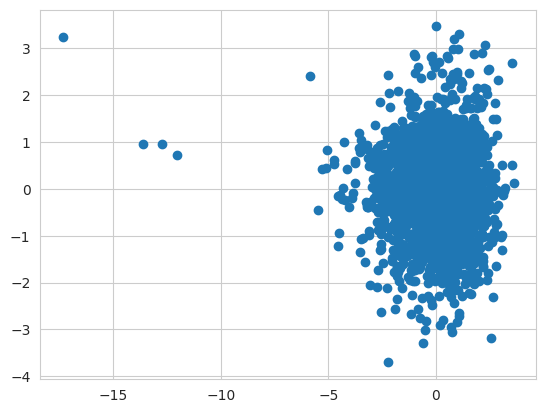

[-304.86148866]


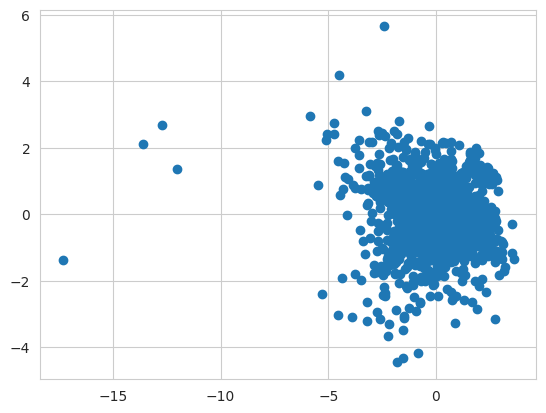

[-62.58092231]


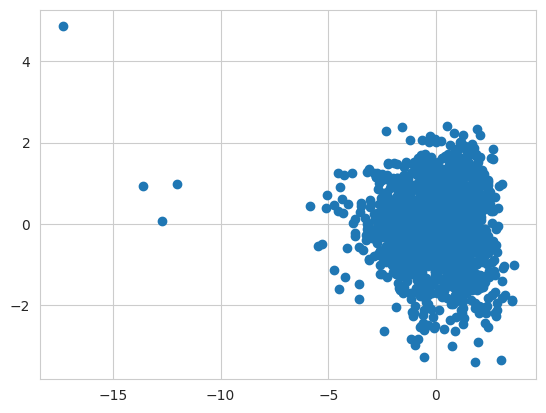

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[69.3410424]


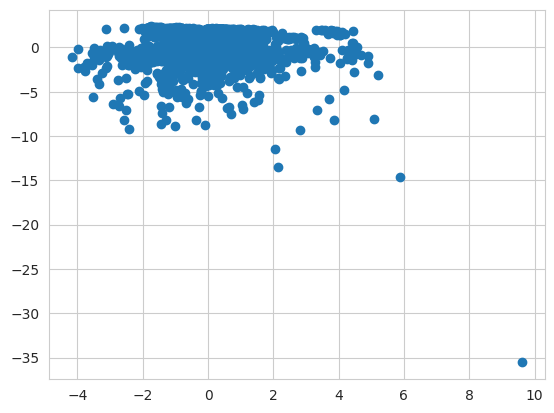

[-287.44958194]


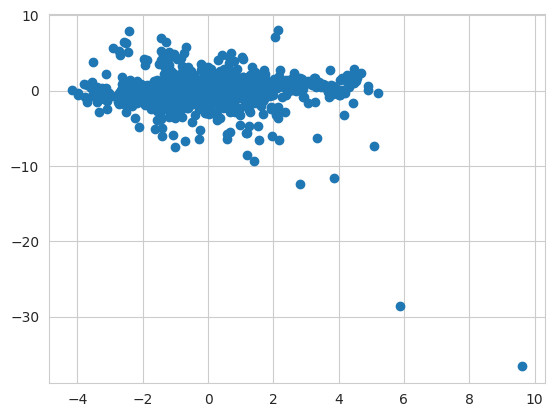

[43.92369477]


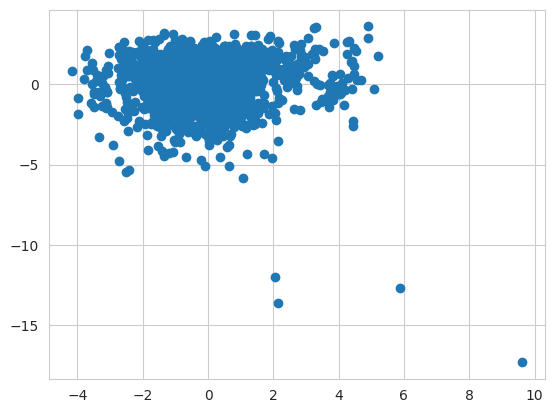

[67.00627814]


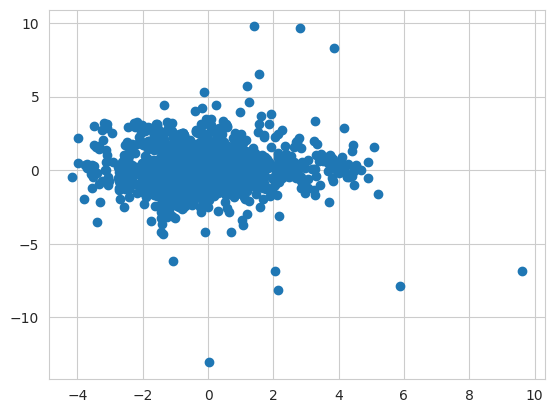

[-37.03399818]


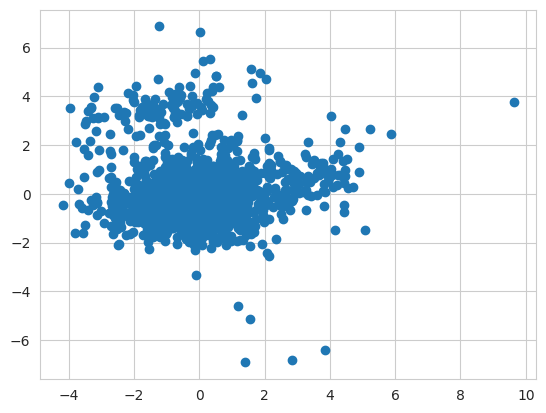

[290.96053296]


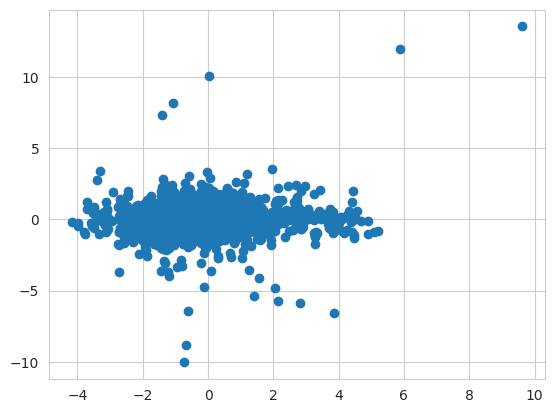

[24.9126195]


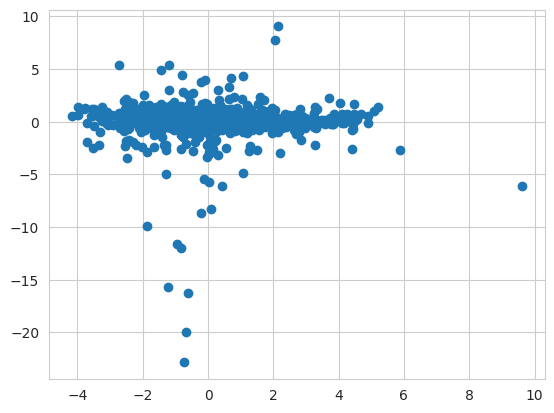

[86.72659822]


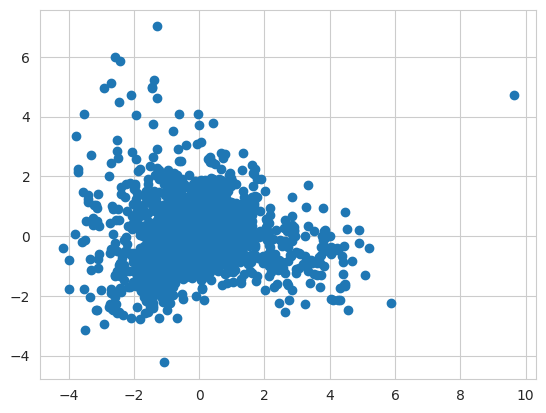

[208.11488093]


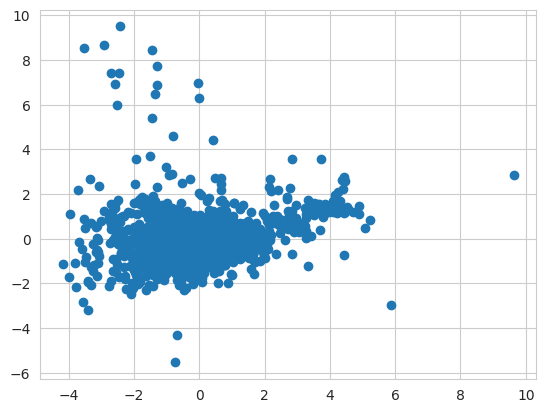

[-252.39676772]


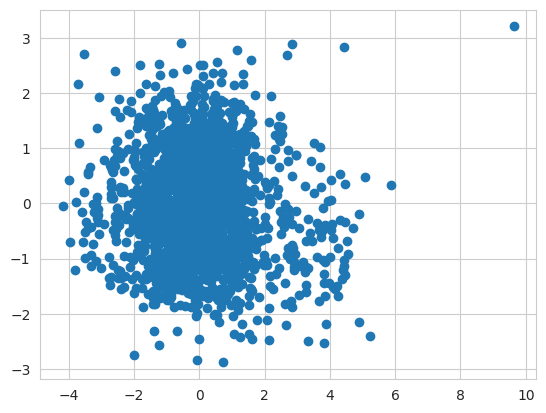

[71.54192879]


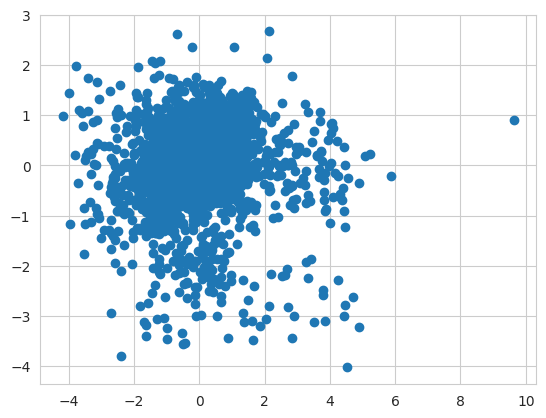

[118.80784338]


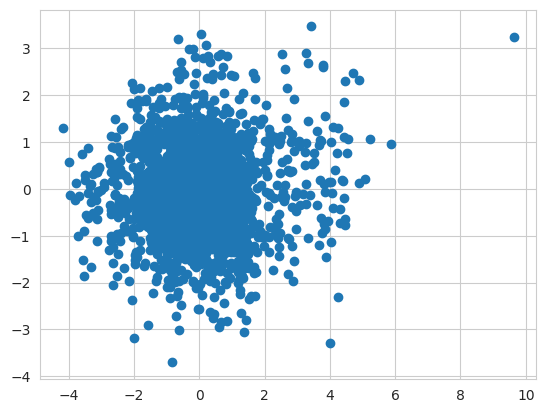

[247.81020955]


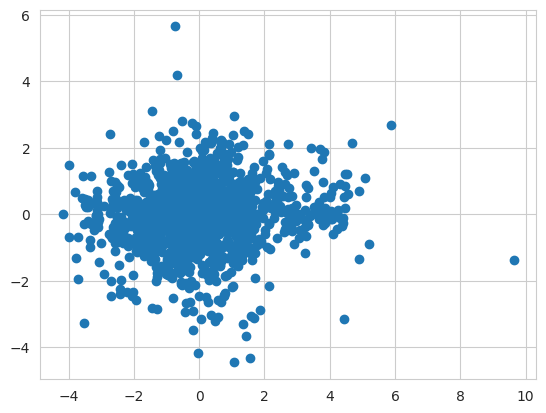

[-42.25233341]


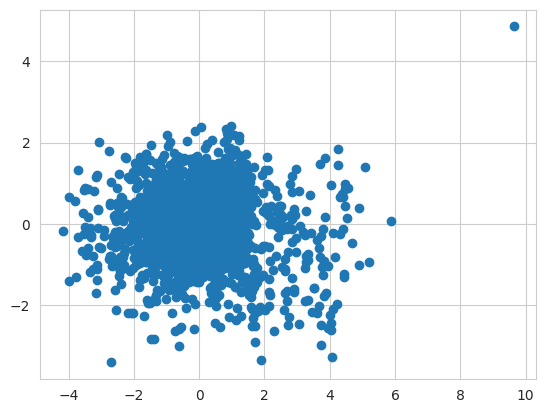

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[61.60239484]


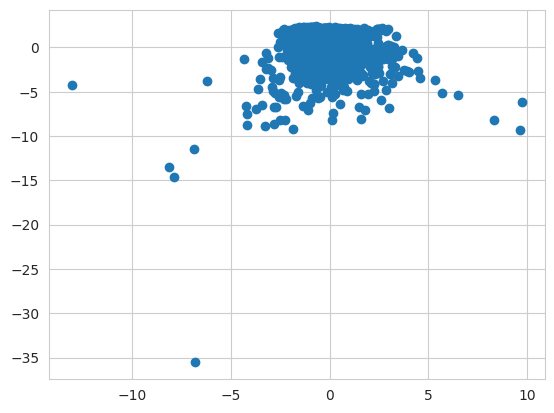

[517.38593432]


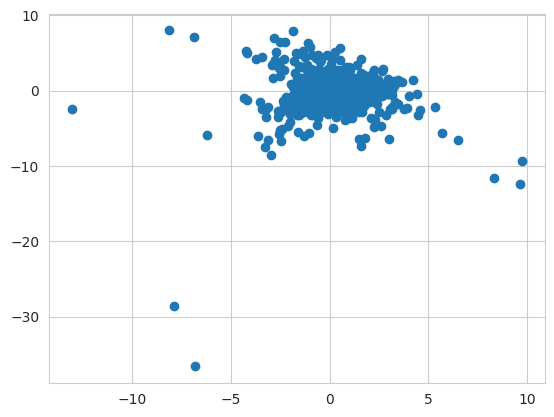

[-25.41927298]


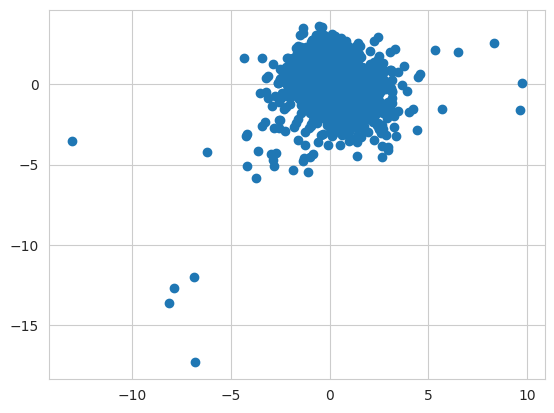

[67.00627814]


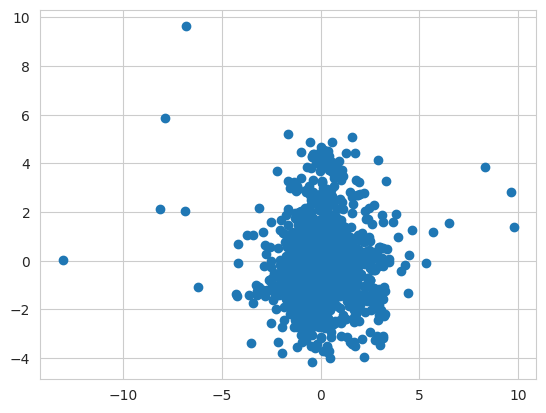

[277.5384503]


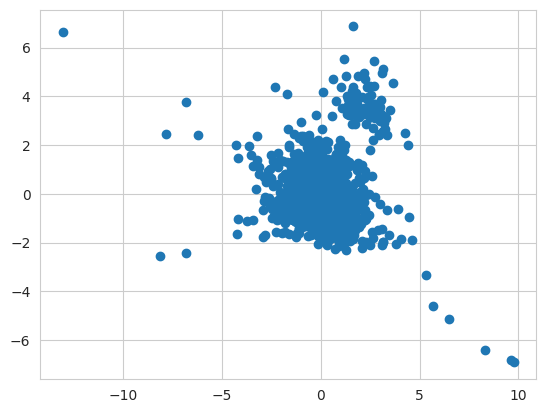

[170.11128921]


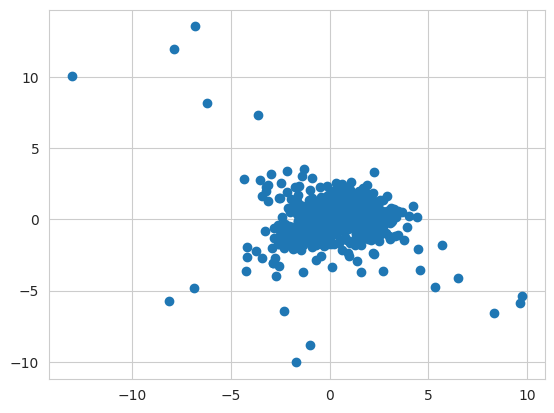

[-58.69305223]


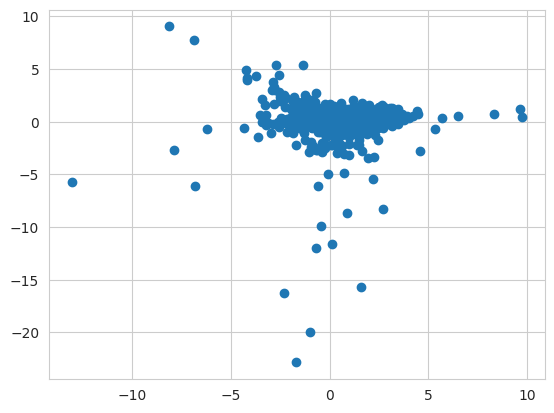

[-75.90629564]


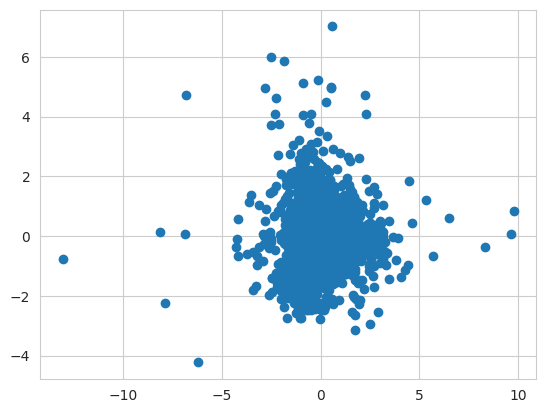

[-436.04036888]


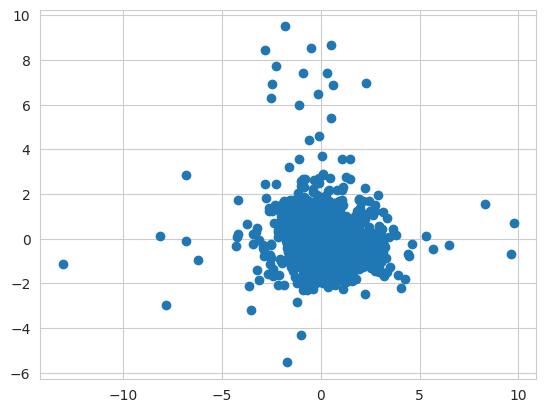

[-1.53792803]


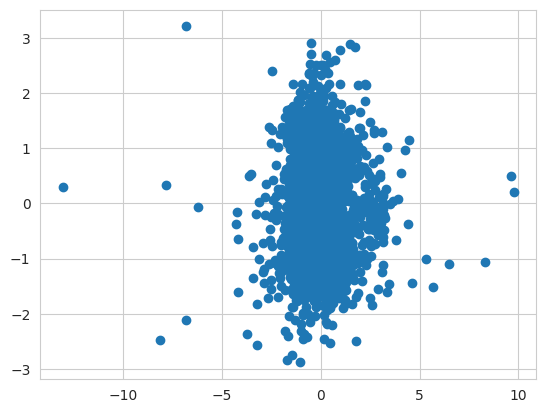

[-121.76368225]


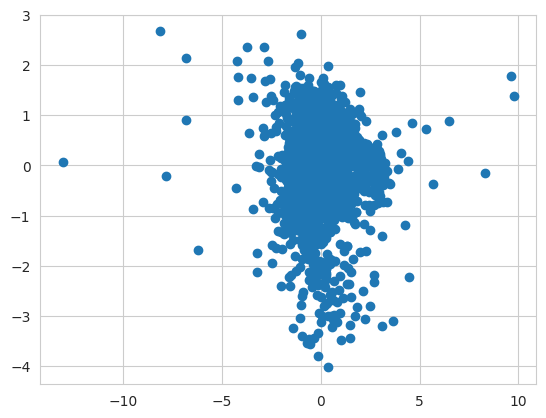

[16.6600718]


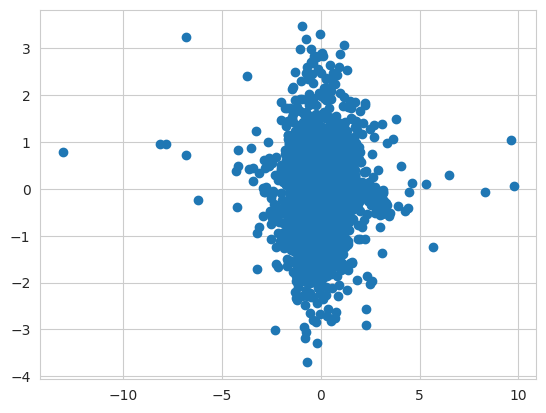

[-180.40238598]


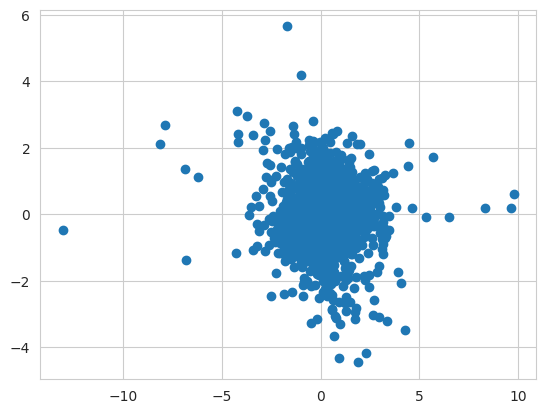

[-149.13875642]


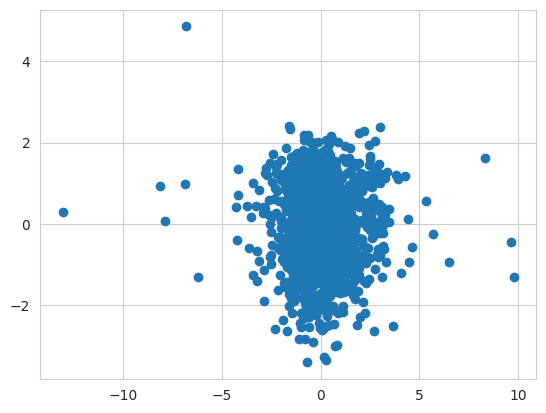

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-265.92439321]


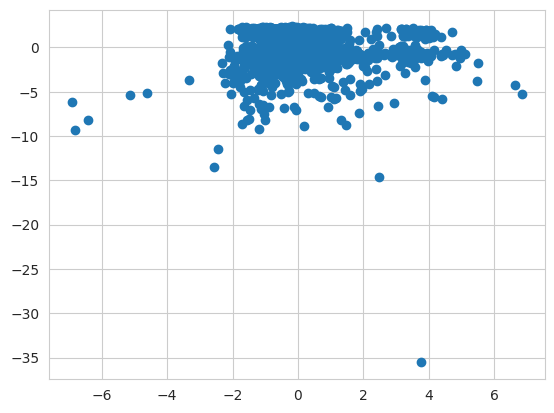

[-97.083105]


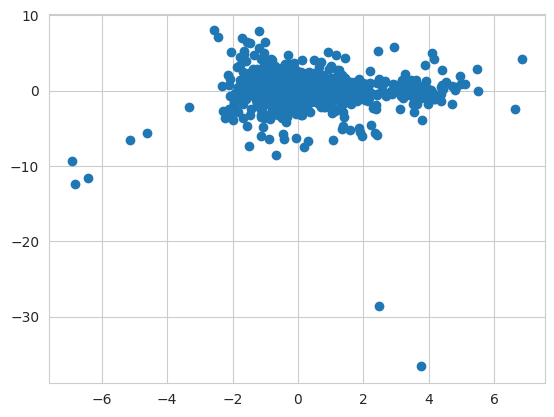

[57.62217689]


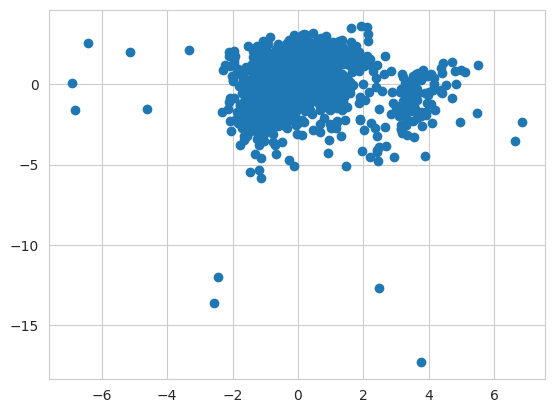

[-37.03399818]


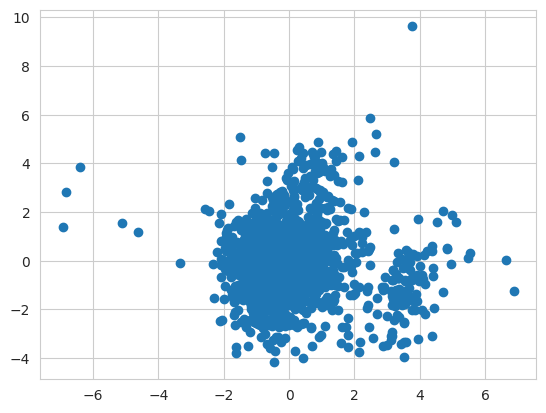

[277.5384503]


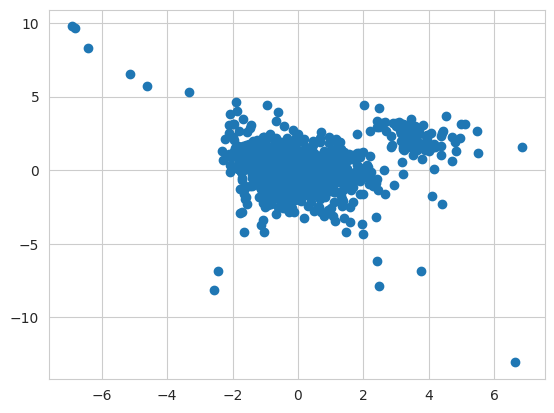

[-250.98346359]


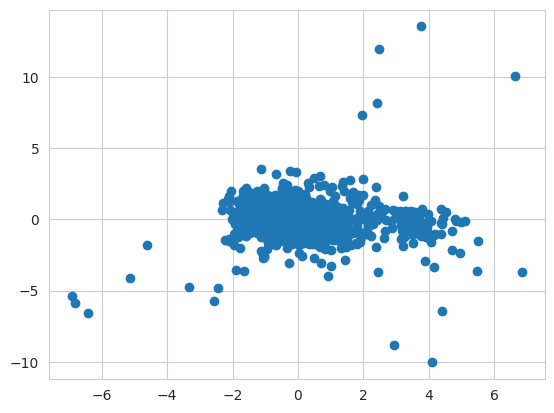

[-105.38477763]


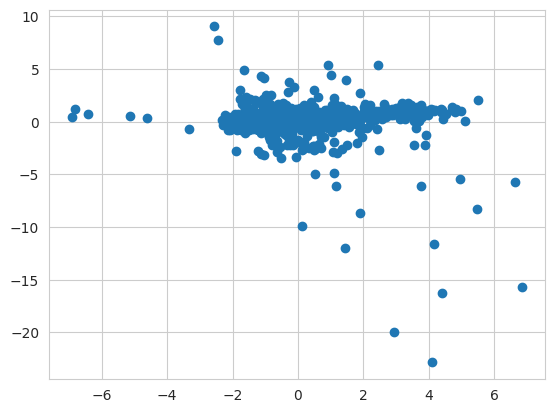

[40.76870254]


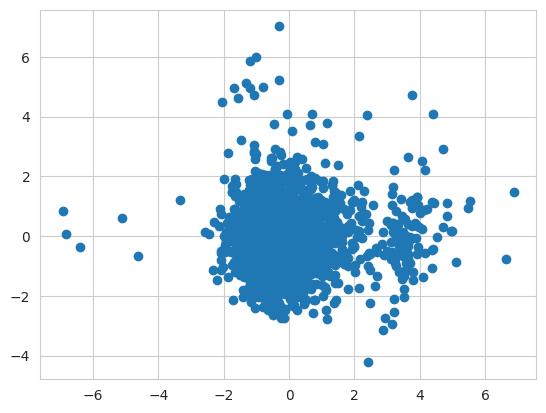

[-69.04521957]


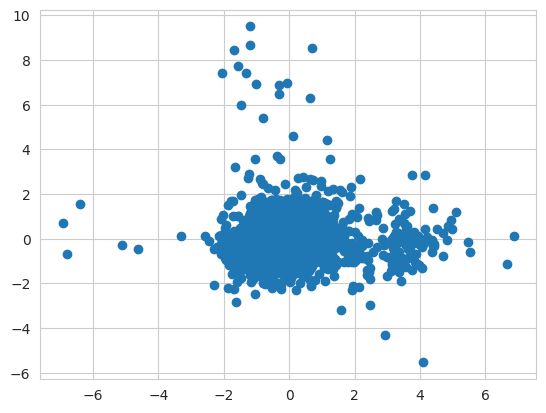

[75.83930629]


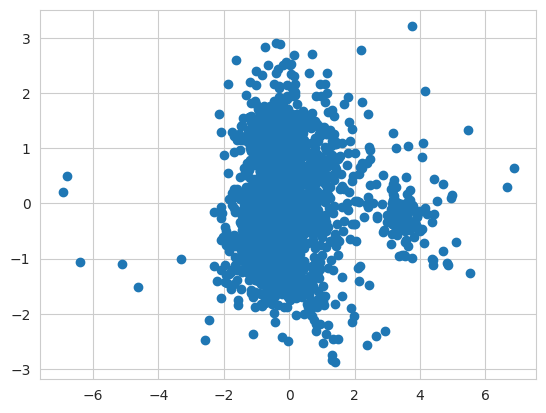

[-88.45873814]


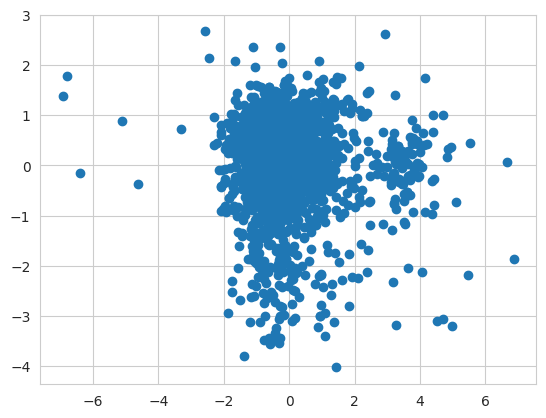

[-7.16775245]


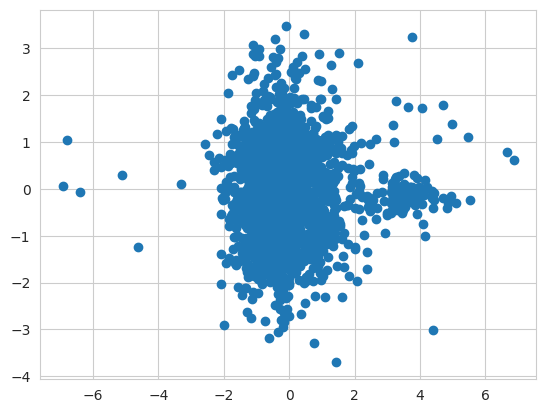

[-27.92362849]


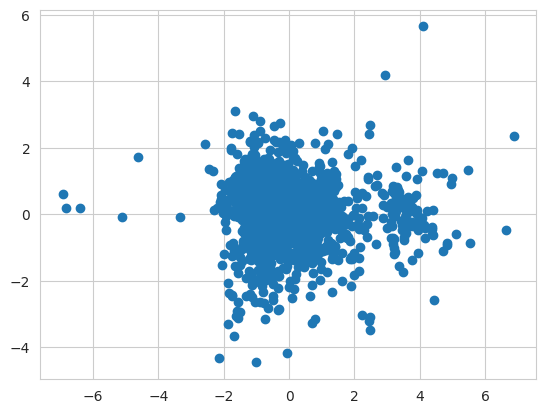

[-56.00034586]


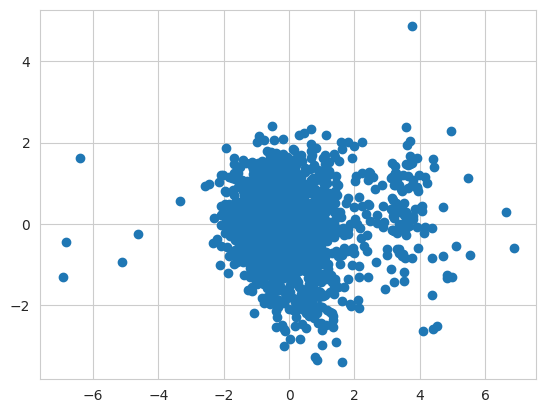

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-532.17996432]


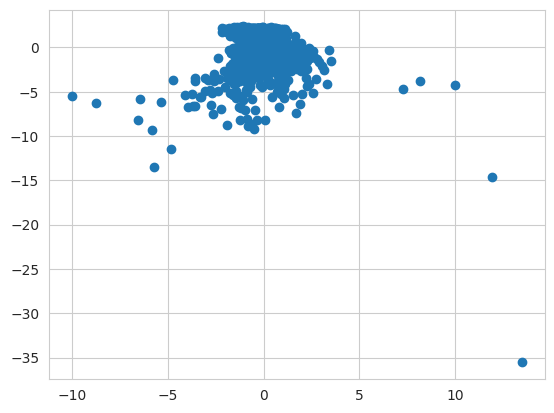

[-571.91310781]


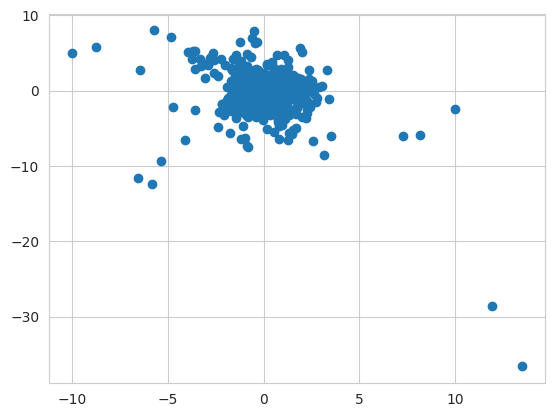

[-432.83453685]


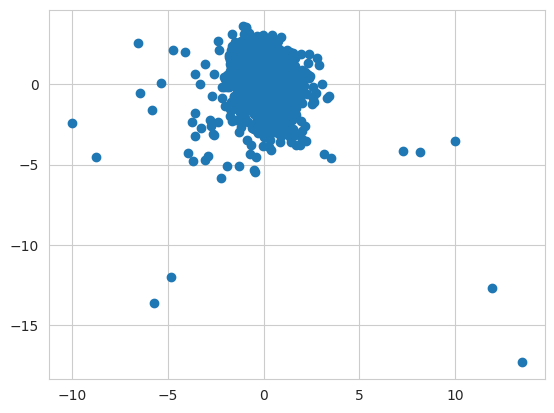

[290.96053296]


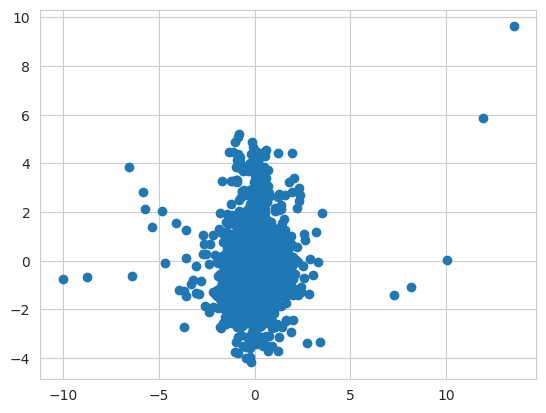

[170.11128921]


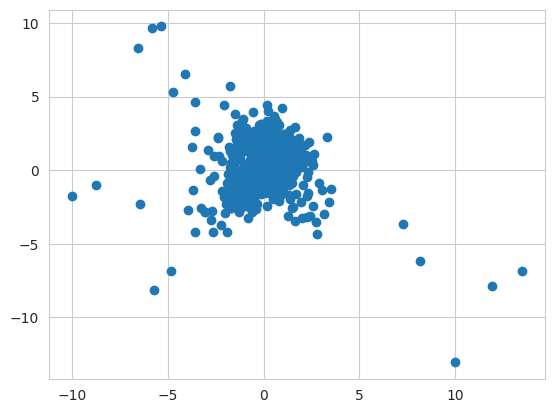

[-250.98346359]


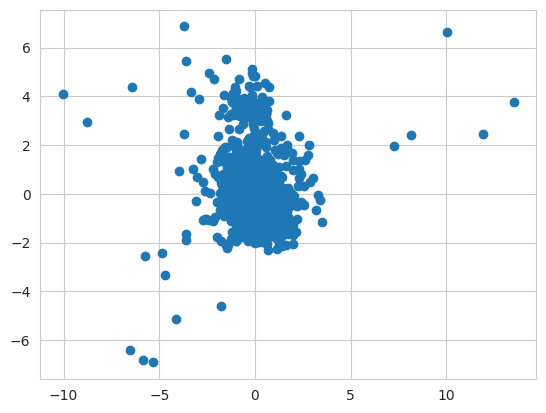

[31.58095347]


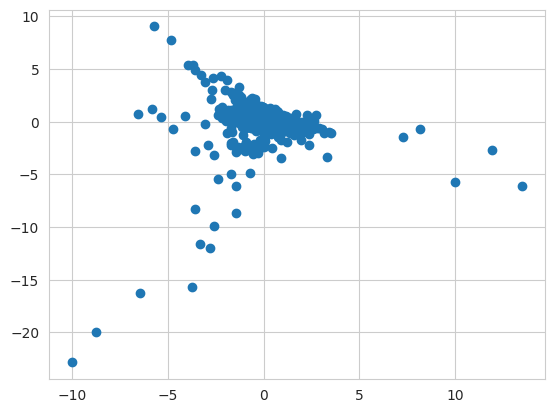

[-120.76770449]


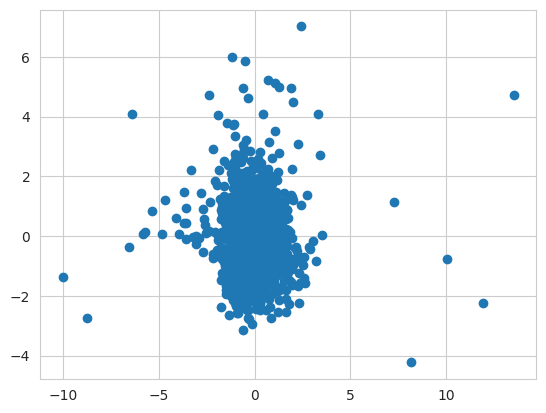

[-199.7736168]


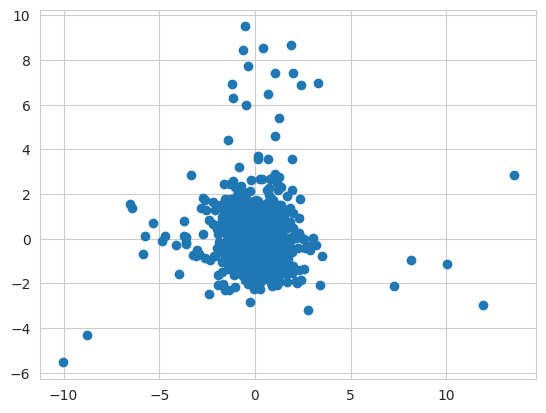

[163.3052616]


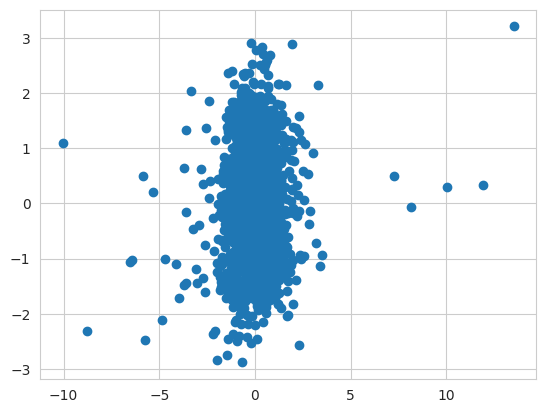

[-199.03592238]


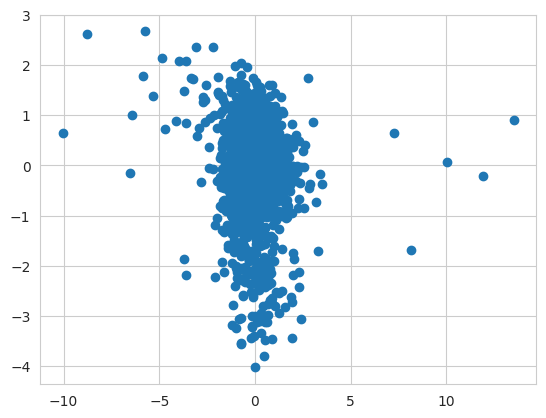

[52.01334322]


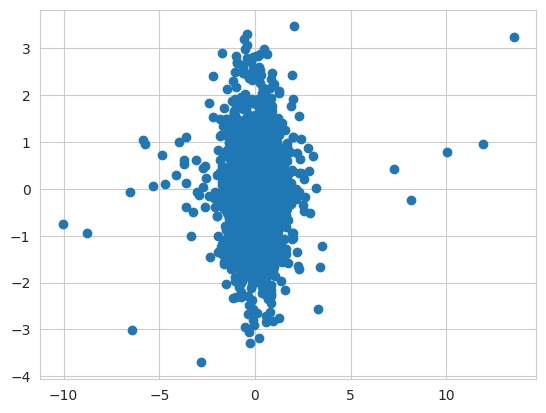

[-199.62187725]


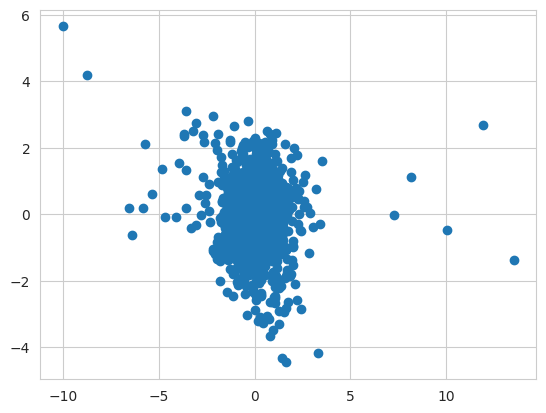

[-11.36779581]


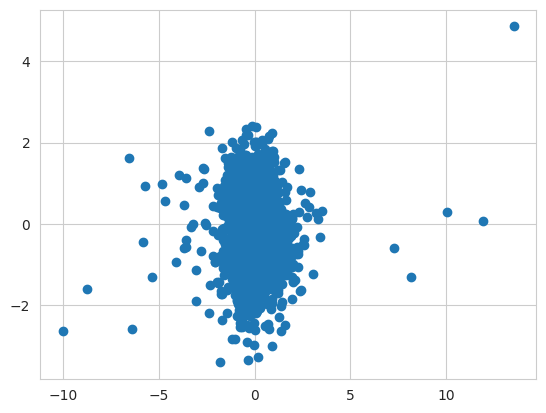

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[118.1387871]


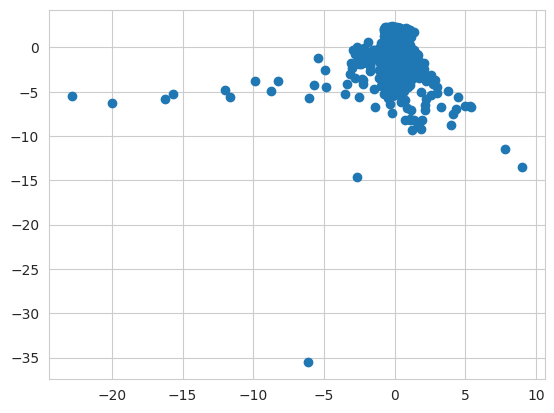

[147.12393609]


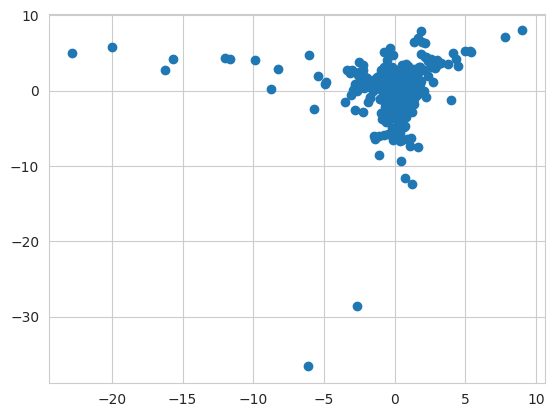

[98.36325328]


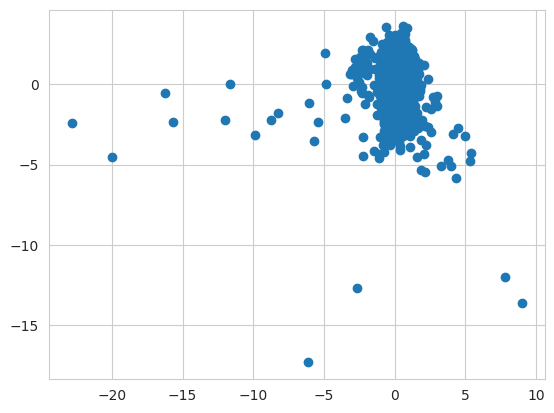

[24.9126195]


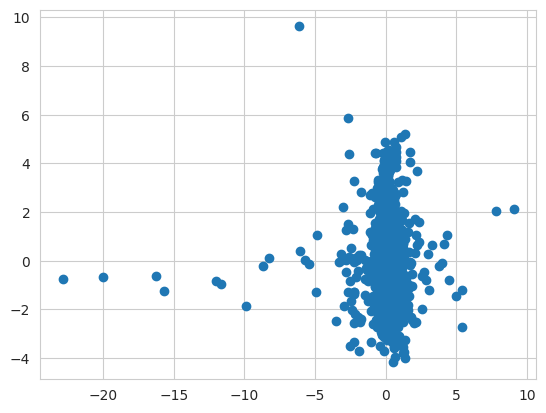

[-58.69305223]


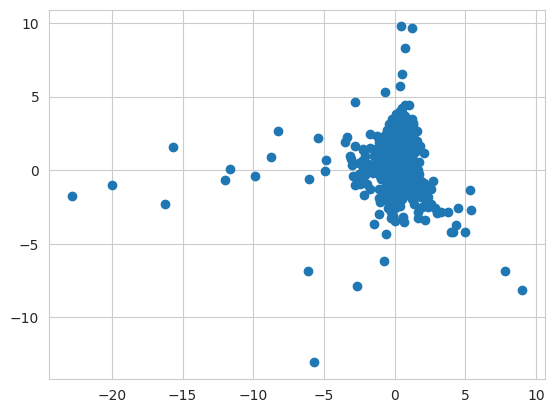

[-105.38477763]


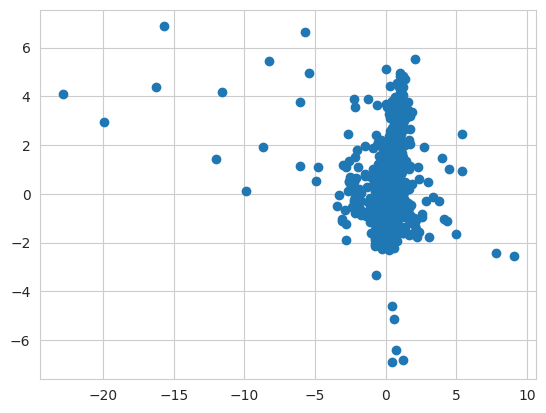

[31.58095347]


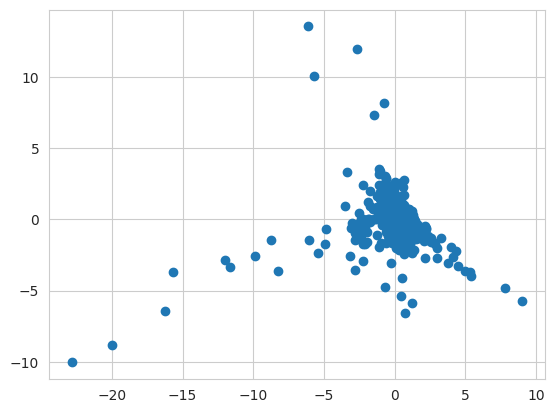

[-124.15409466]


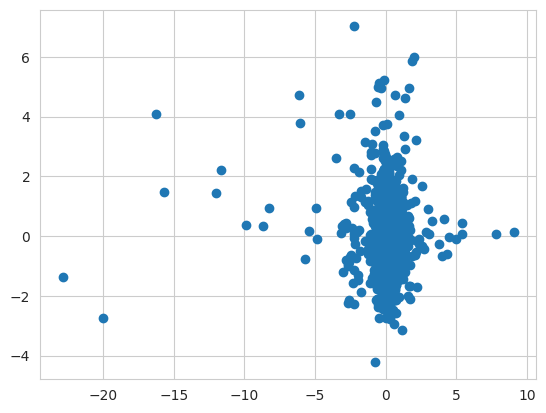

[-3.39030072]


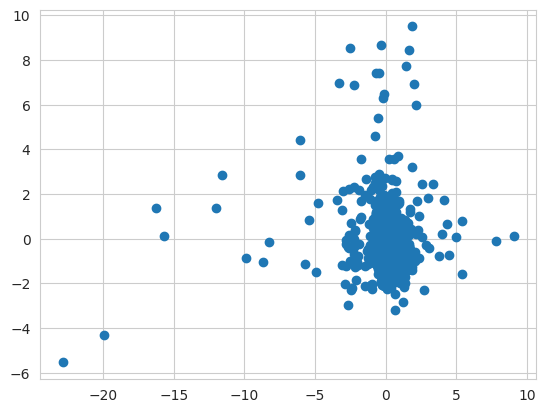

[-156.61807644]


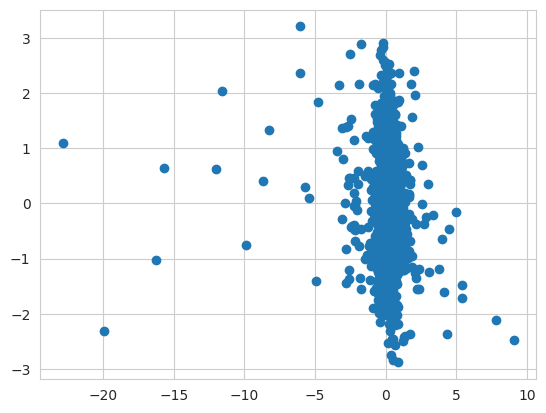

[180.6263859]


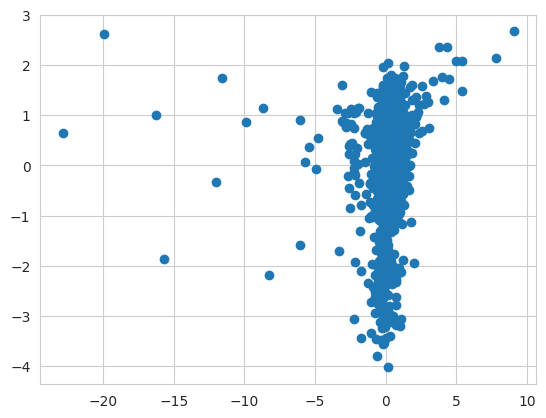

[16.19190855]


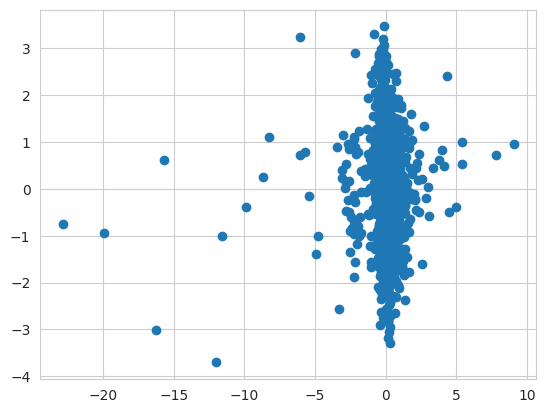

[-8.81241486]


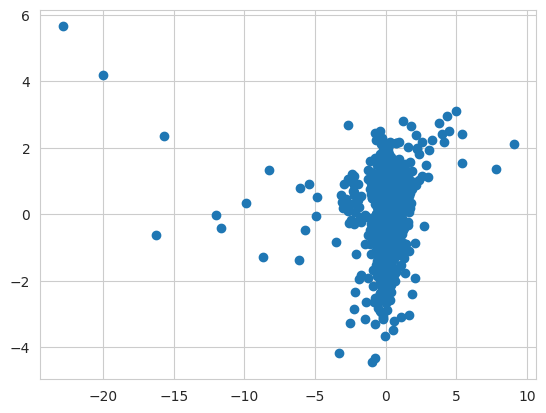

[128.30912934]


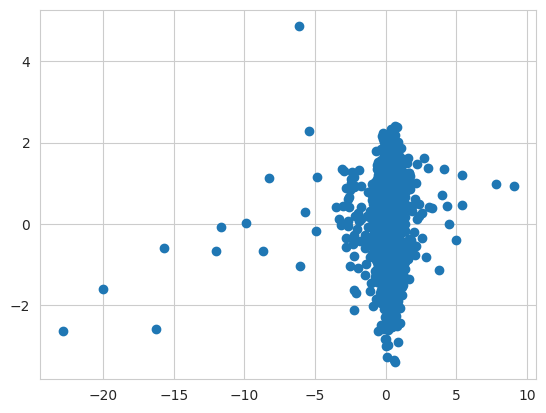

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-335.129825]


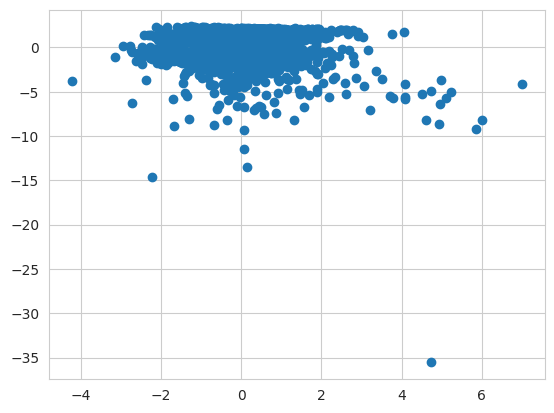

[256.12345219]


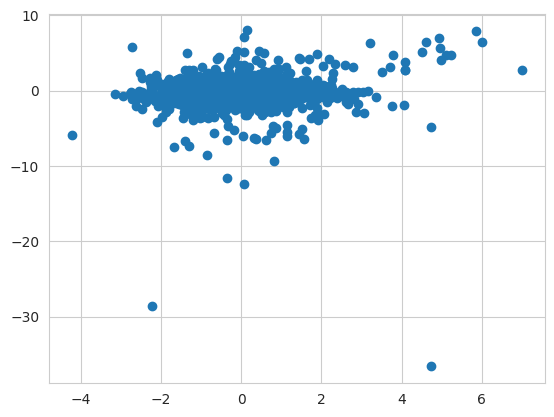

[-176.64436986]


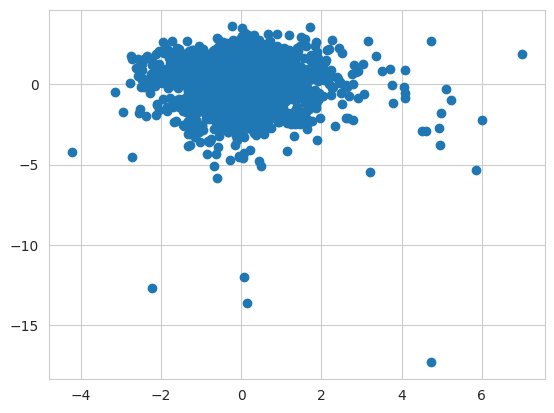

[86.72659822]


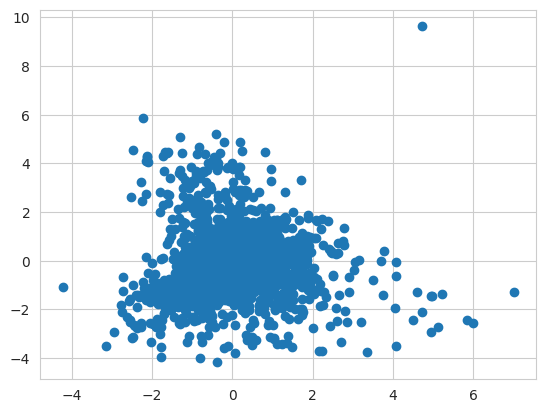

[-75.90629564]


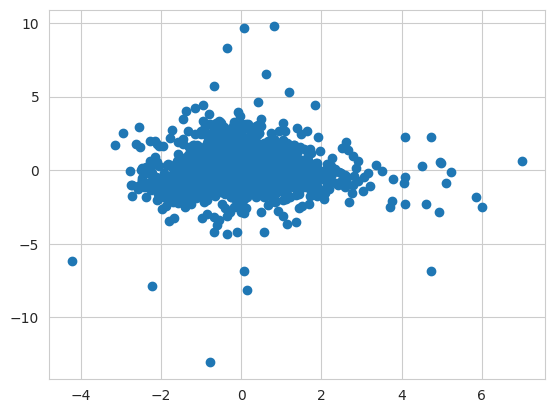

[40.76870254]


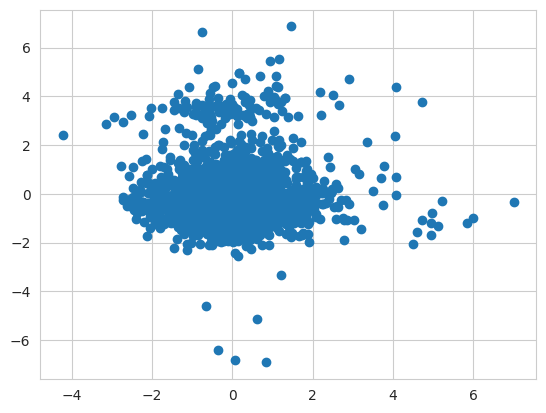

[-120.76770449]


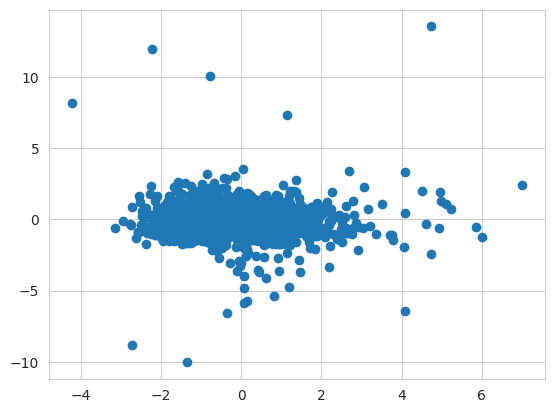

[-124.15409466]


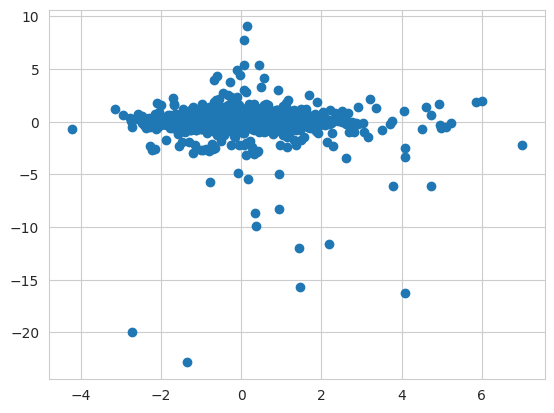

[-10.84955744]


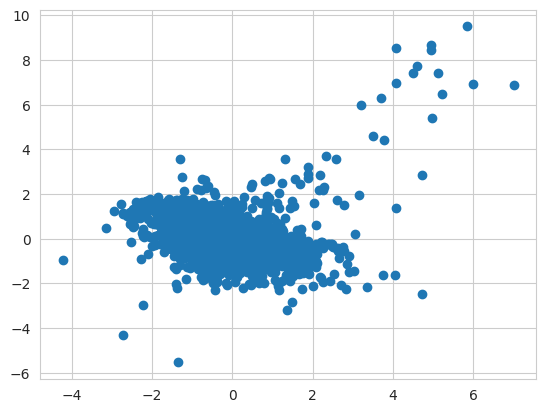

[5.32418623]


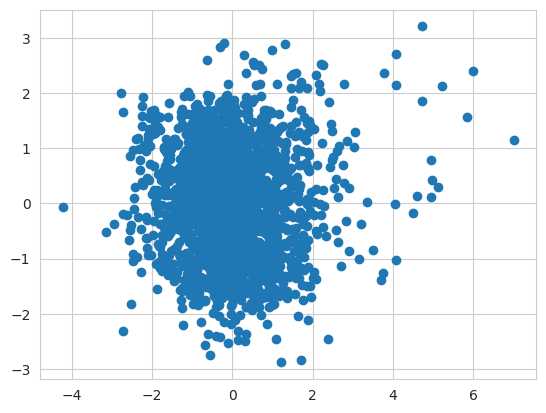

[-38.4524421]


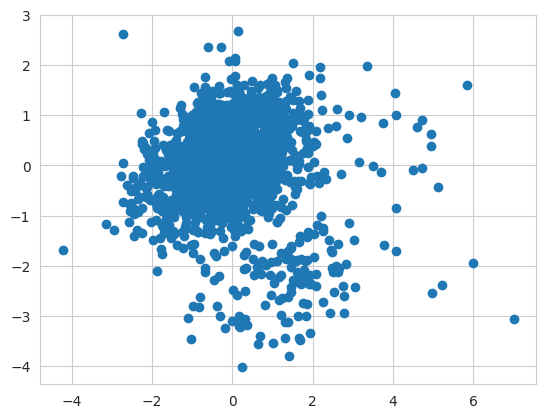

[-31.58686939]


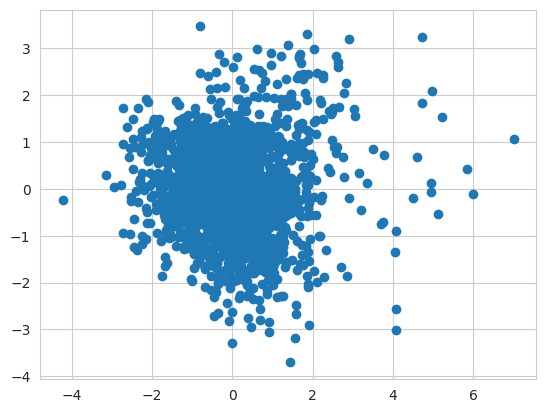

[-142.410645]


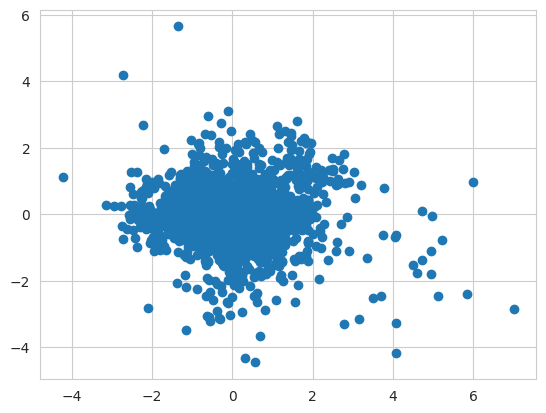

[14.21389171]


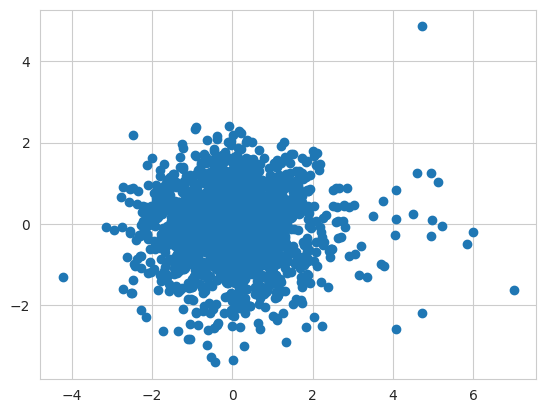

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-266.48109096]


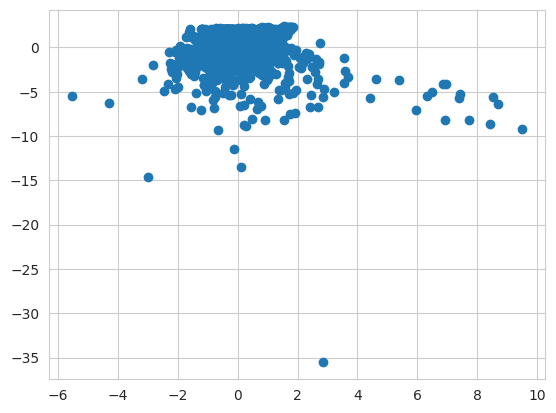

[339.91707395]


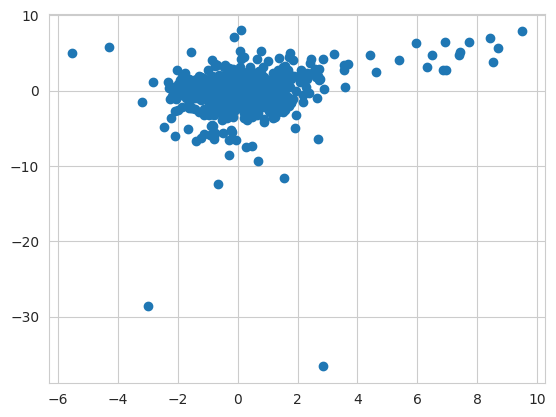

[-283.05593067]


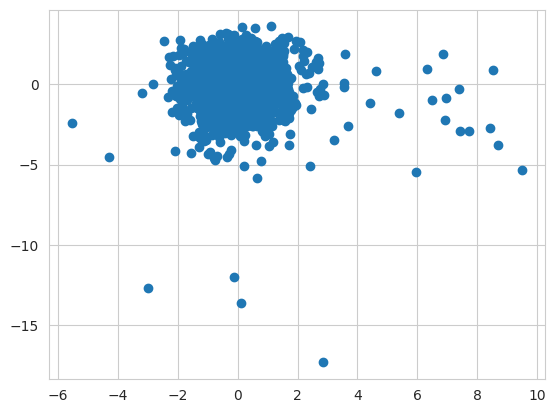

[208.11488093]


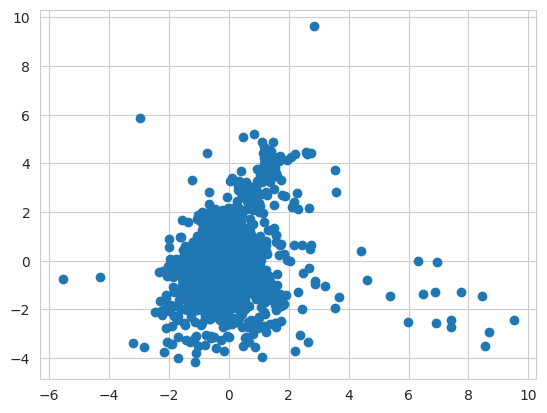

[-436.04036888]


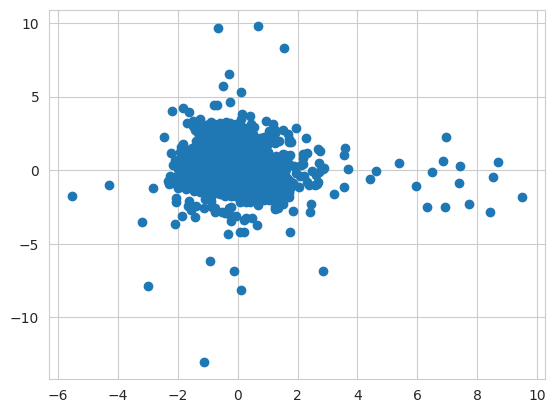

[-69.04521957]


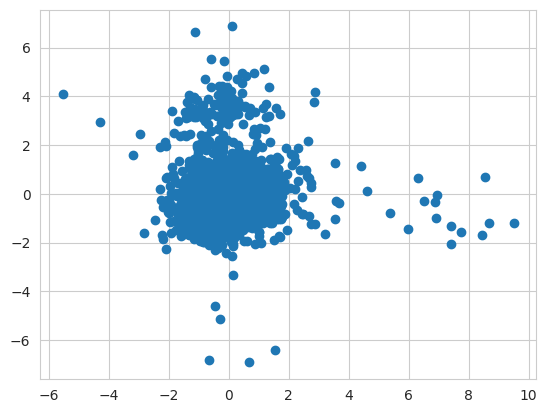

[-199.7736168]


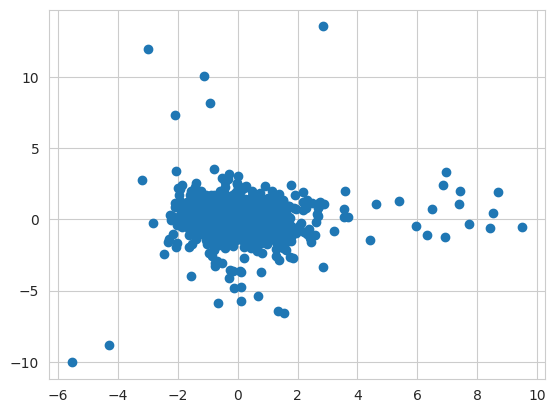

[-3.39030072]


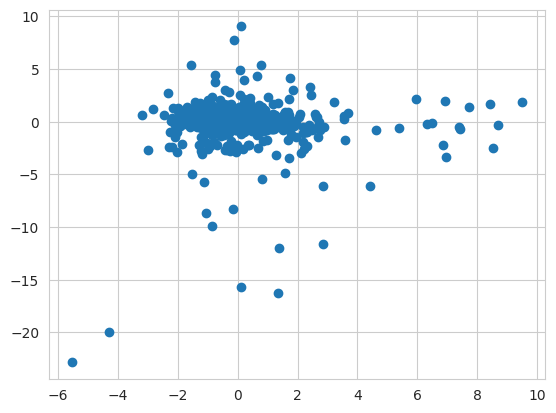

[-10.84955744]


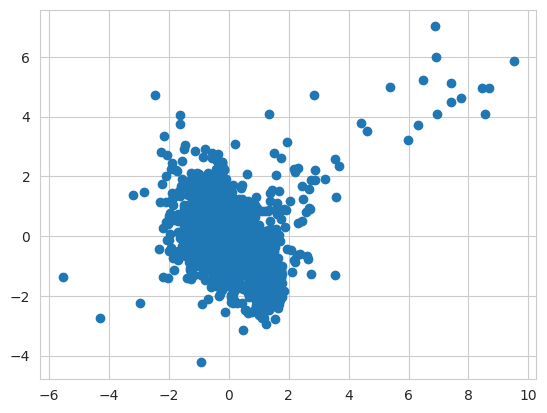

[158.50046954]


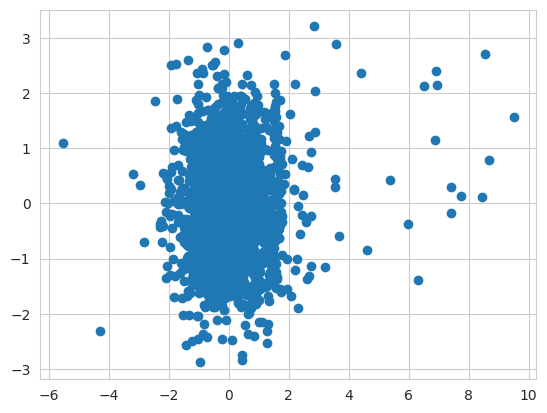

[-331.15244941]


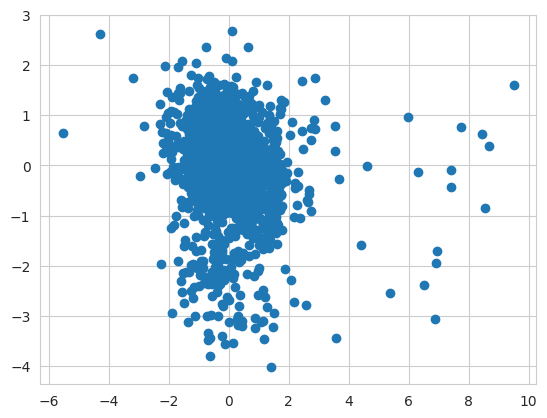

[34.33178215]


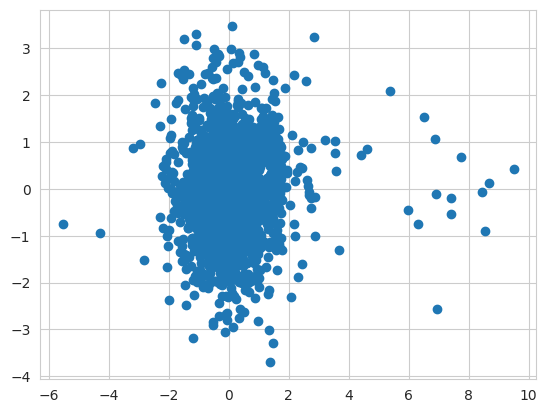

[-176.42270429]


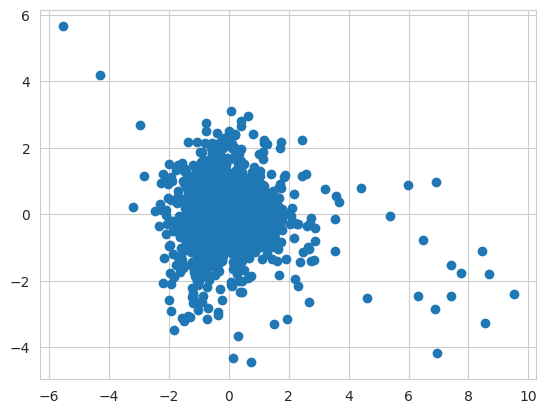

[9.15470097]


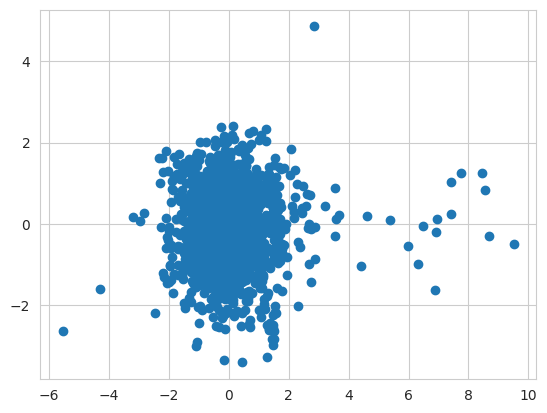

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-85.89768458]


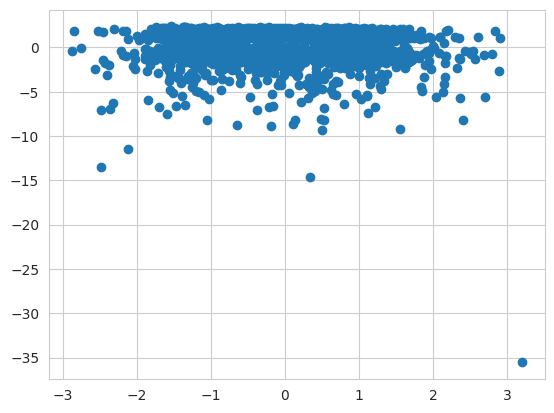

[-62.60098342]


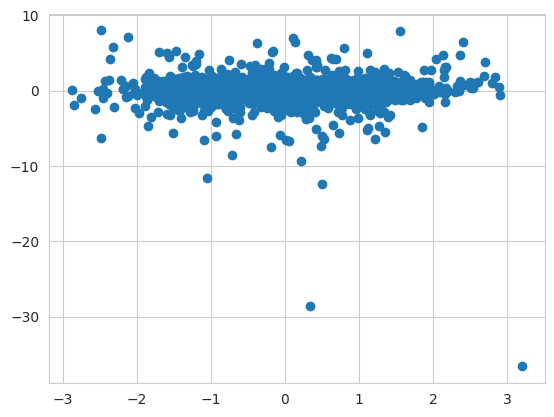

[208.54293549]


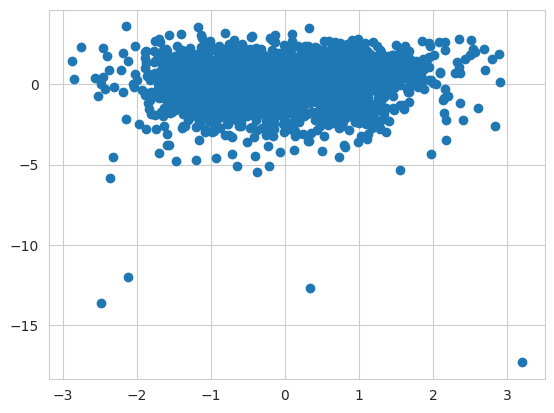

[-252.39676772]


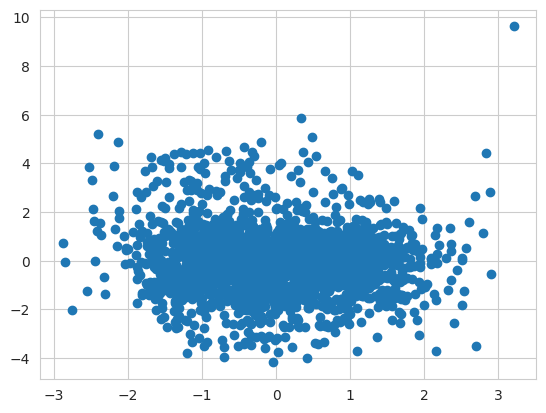

[-1.53792803]


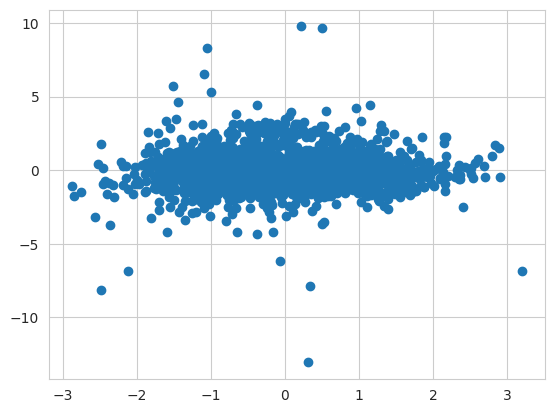

[75.83930629]


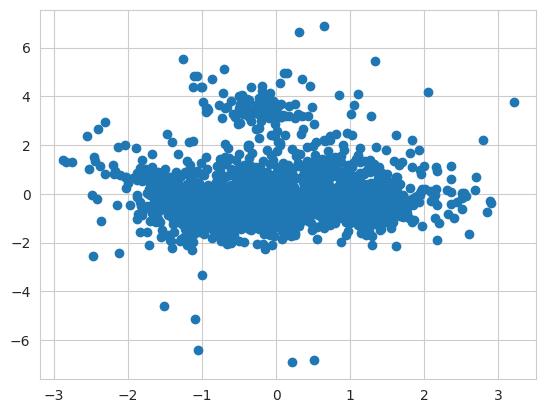

[163.3052616]


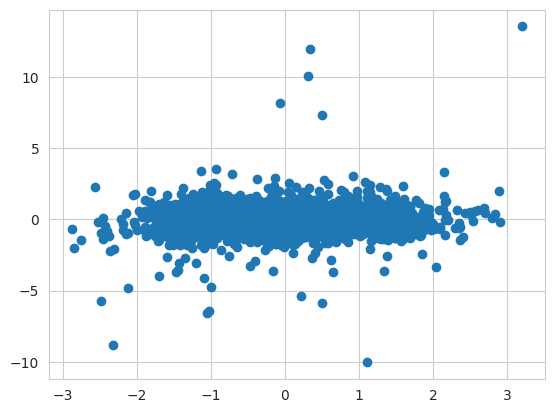

[-156.61807644]


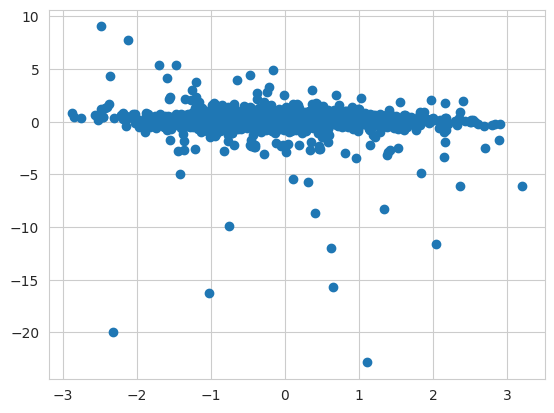

[5.32418623]


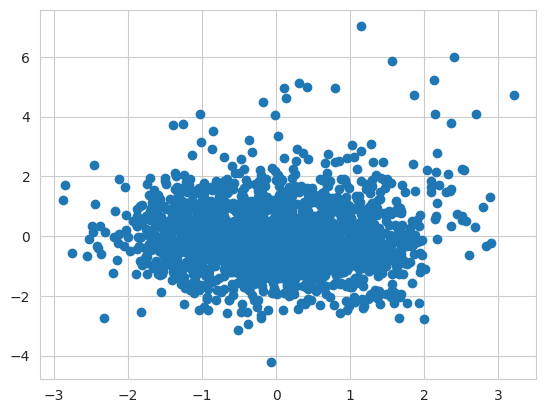

[158.50046954]


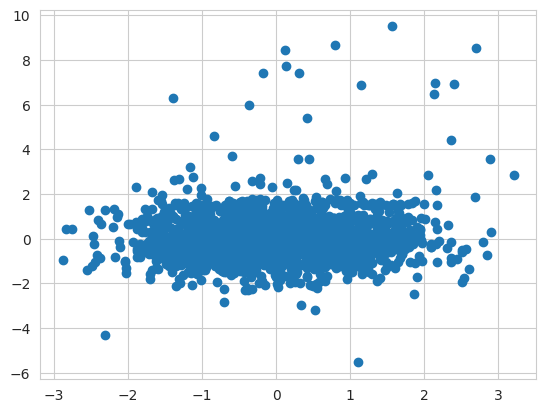

[125.01464124]


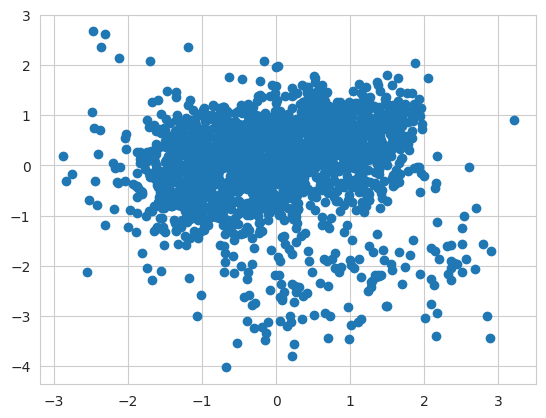

[16.45144992]


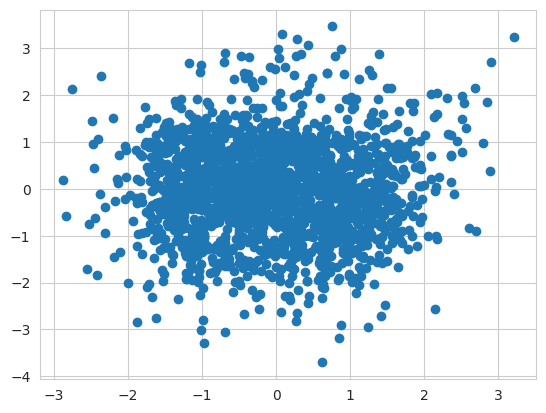

[141.17327829]


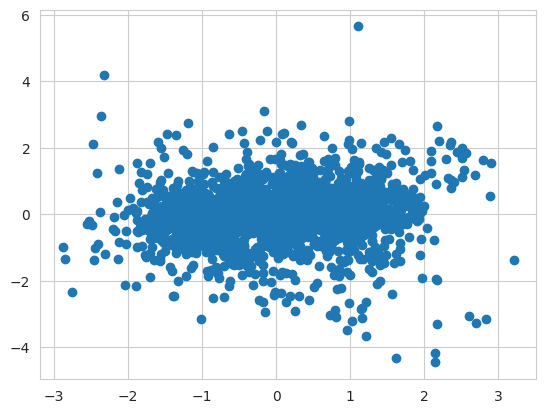

[-36.73137614]


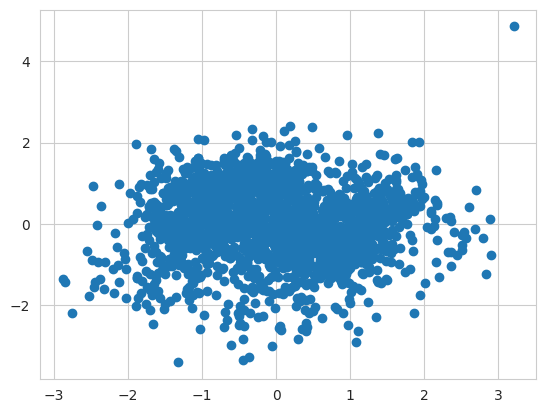

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-271.39939249]


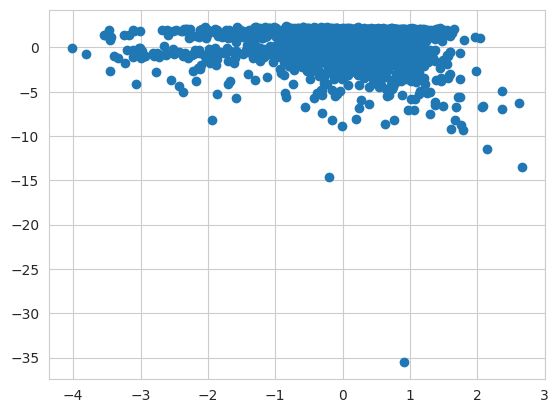

[135.85494867]


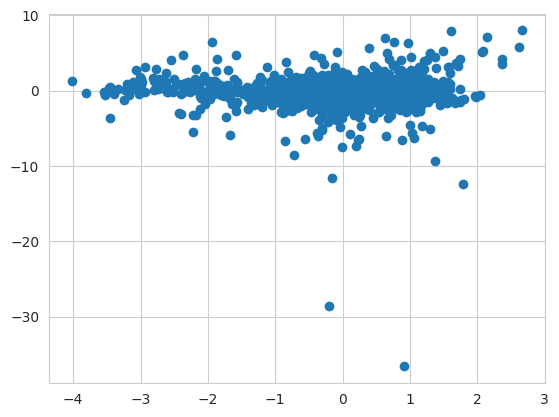

[-338.47071016]


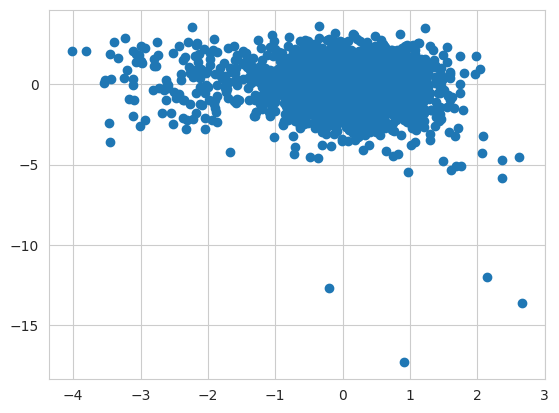

[71.54192879]


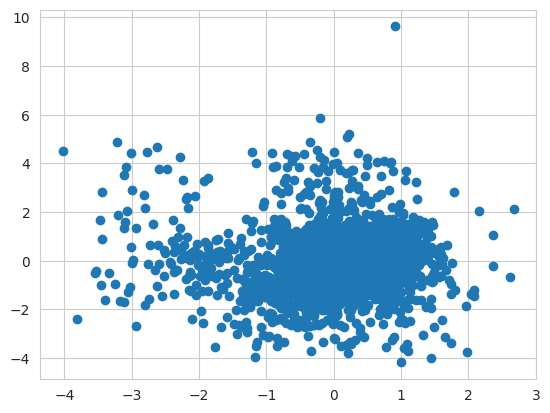

[-121.76368225]


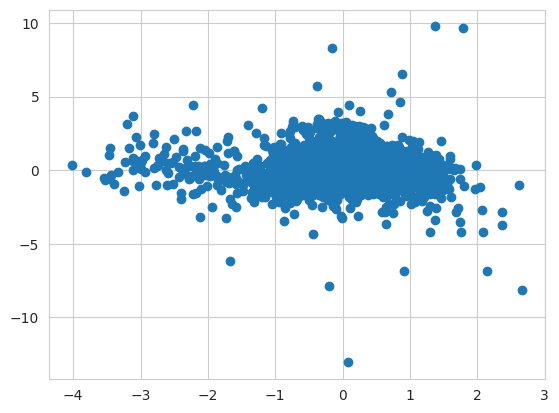

[-88.45873814]


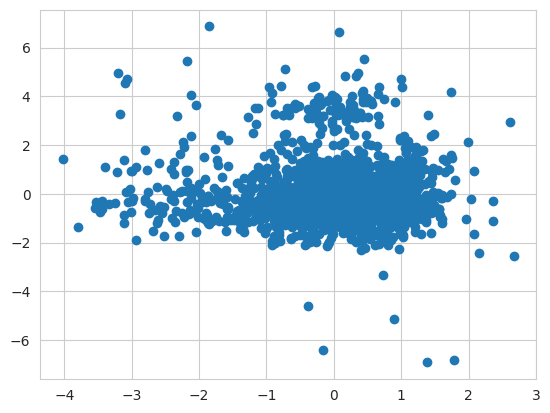

[-199.03592238]


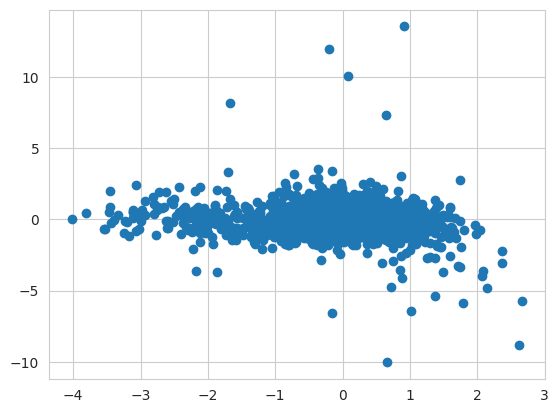

[180.6263859]


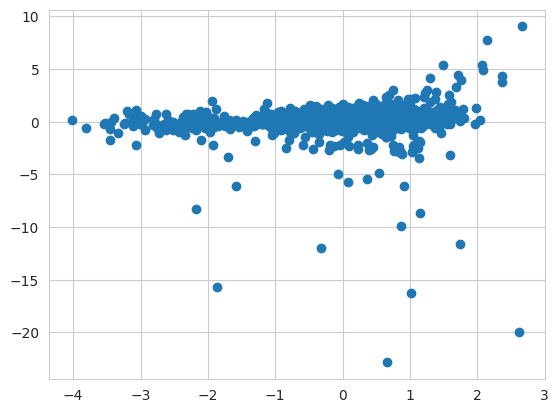

[-38.4524421]


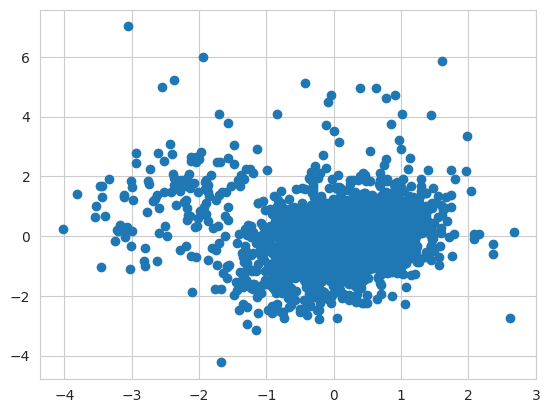

[-331.15244941]


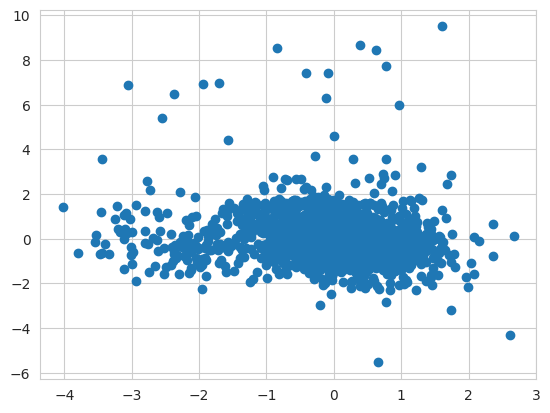

[125.01464124]


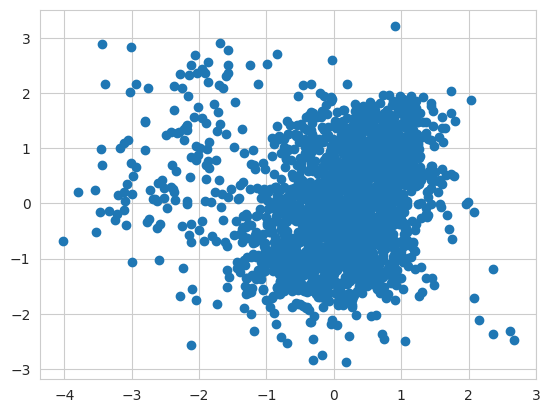

[-5.38234109]


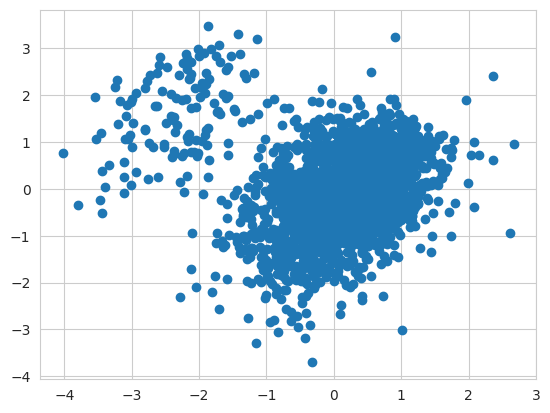

[-196.9558066]


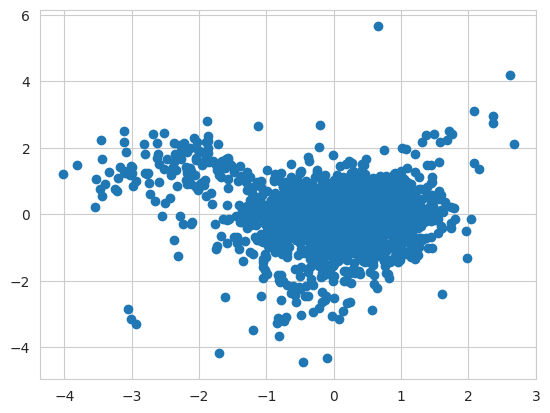

[-28.91373844]


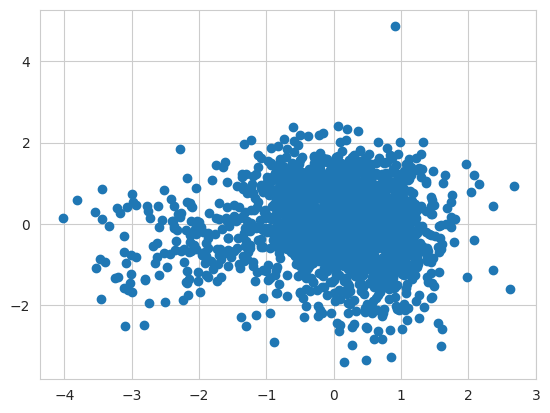

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-84.57339603]


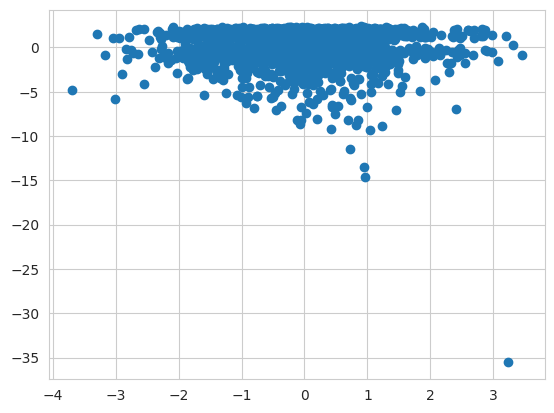

[-60.04043083]


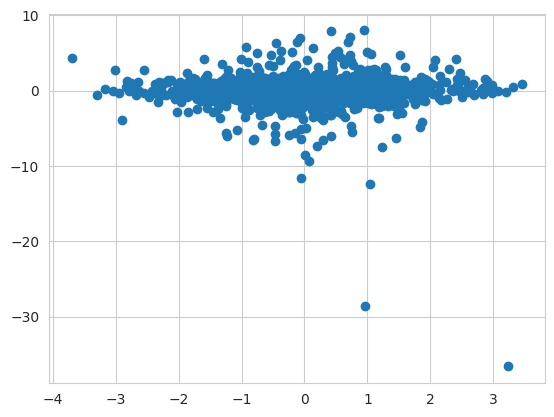

[-105.68578028]


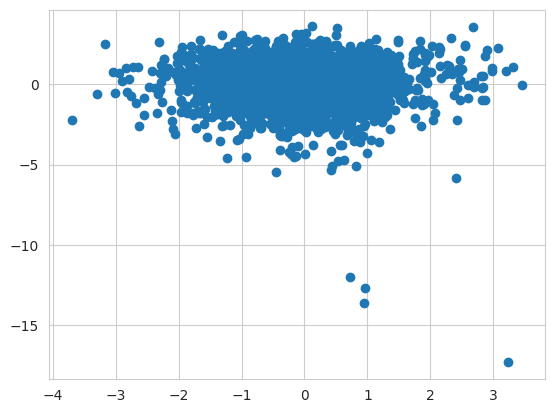

[118.80784338]


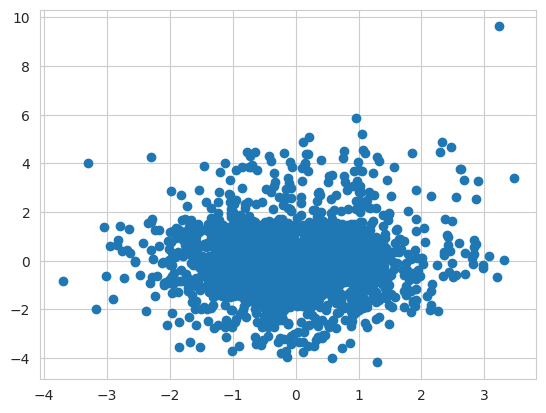

[16.6600718]


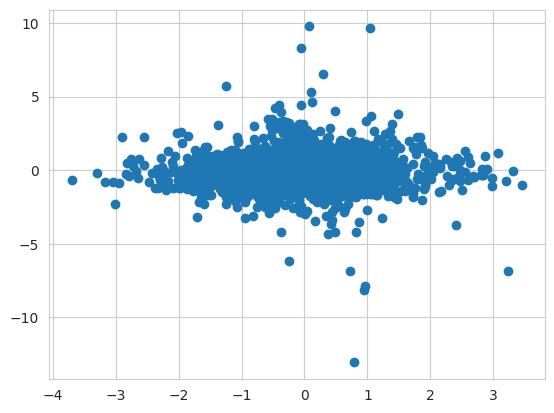

[-7.16775245]


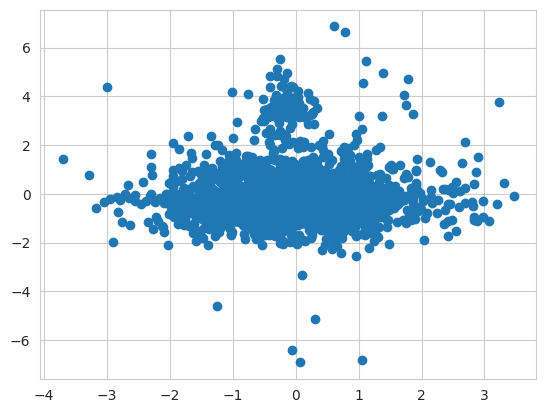

[52.01334322]


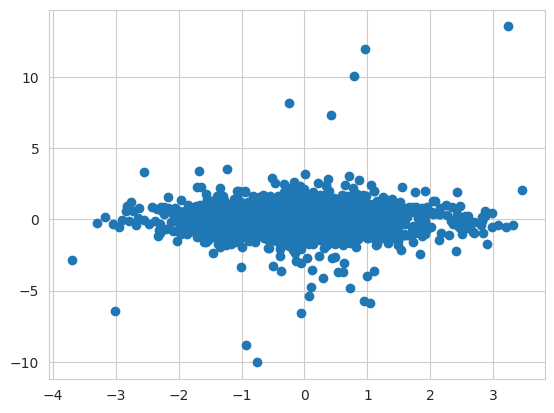

[16.19190855]


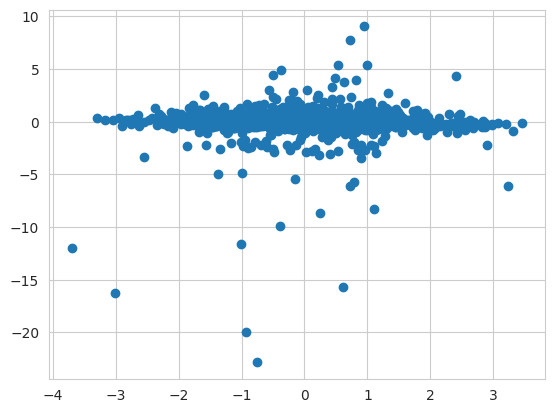

[-31.58686939]


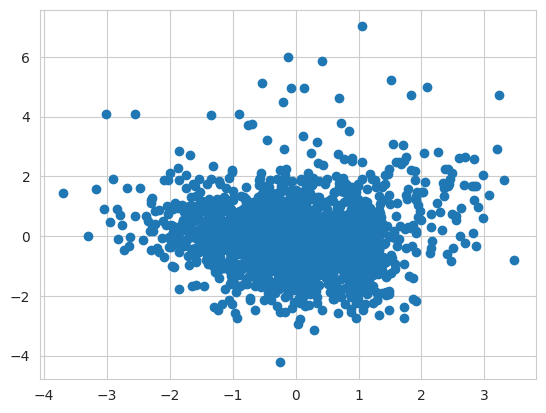

[34.33178215]


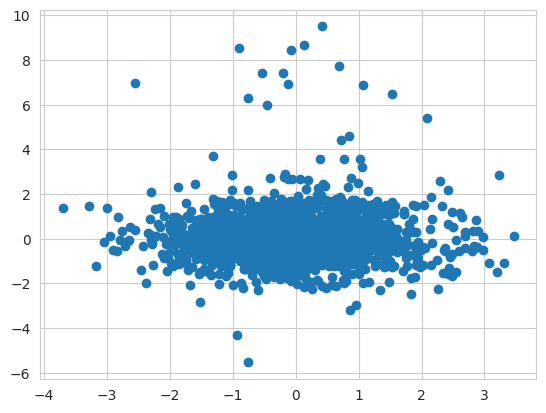

[16.45144992]


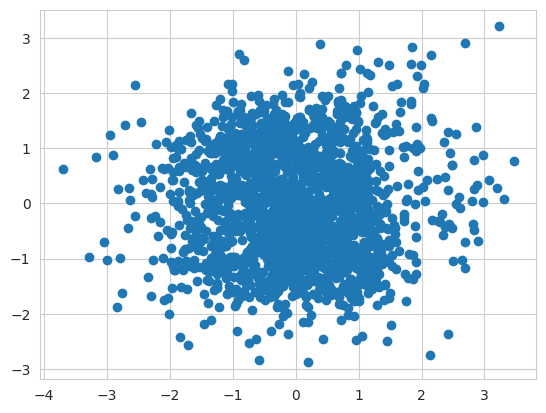

[-5.38234109]


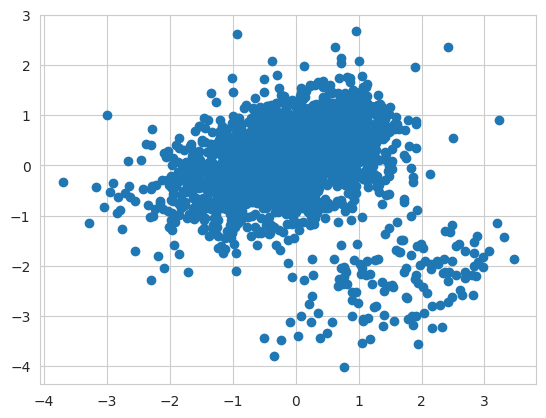

[-2.05247694]


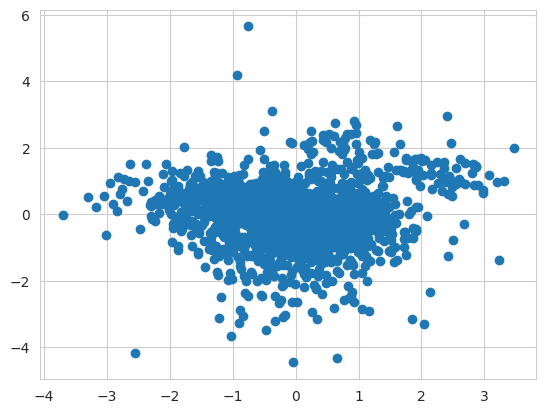

[9.51708367]


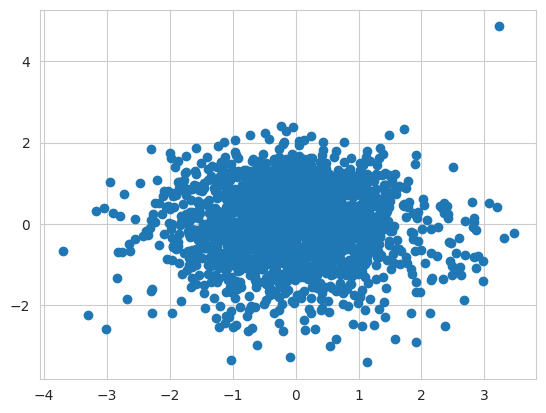

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-218.28595824]


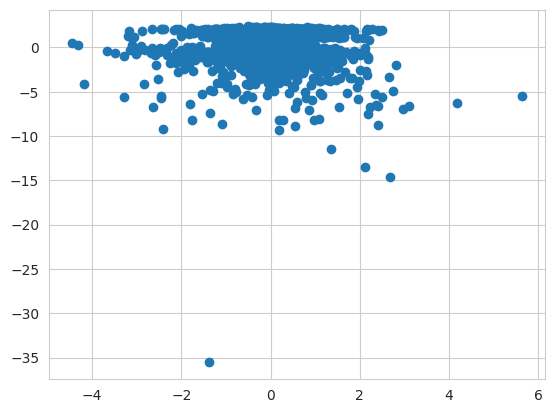

[76.71326167]


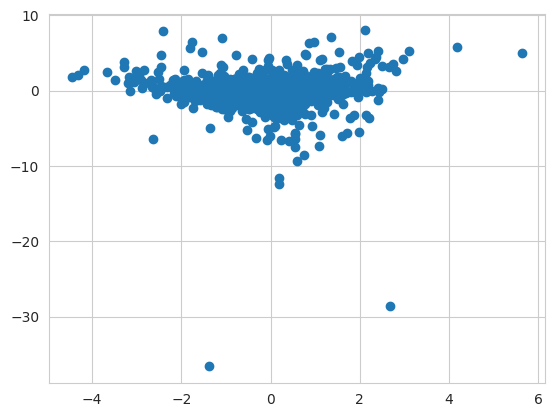

[-304.86148866]


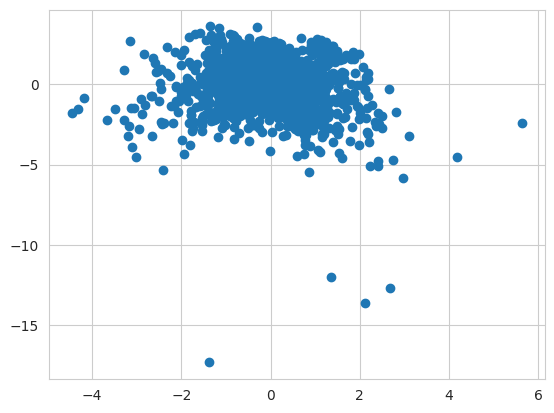

[247.81020955]


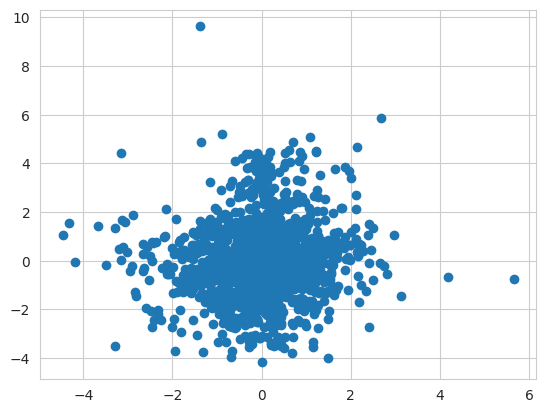

[-180.40238598]


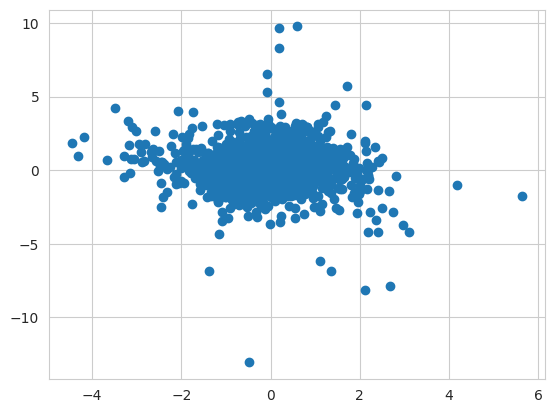

[-27.92362849]


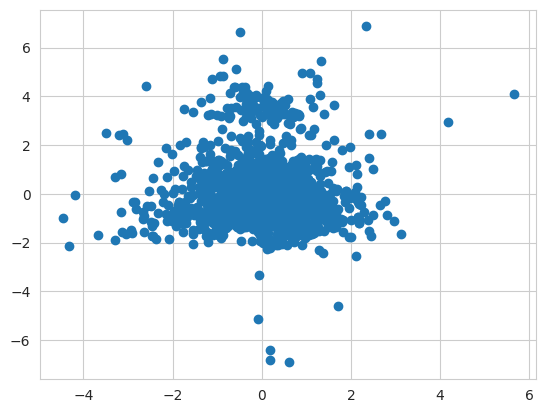

[-199.62187725]


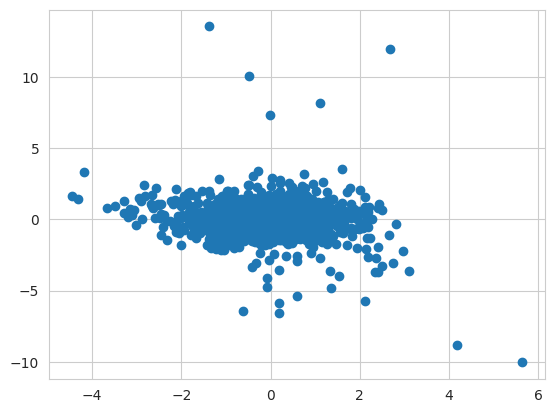

[-8.81241486]


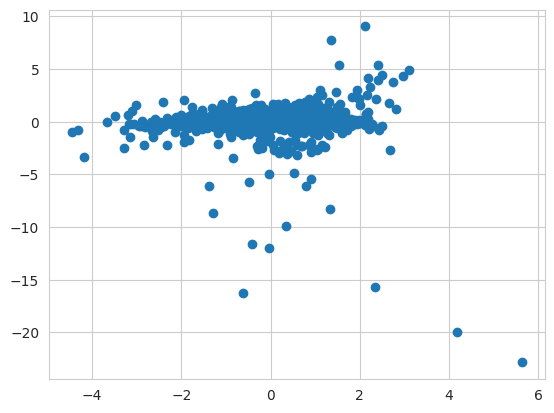

[-142.410645]


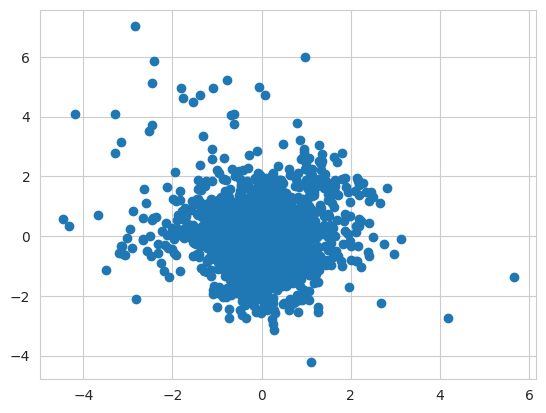

[-176.42270429]


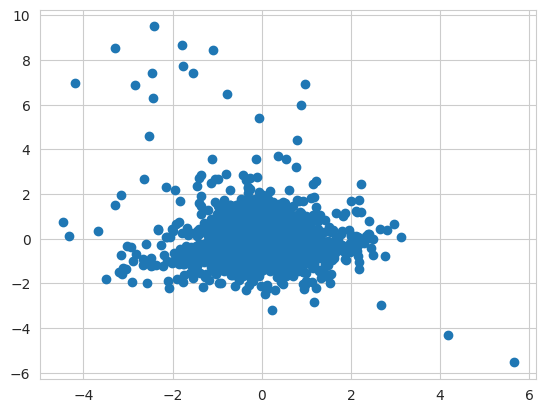

[141.17327829]


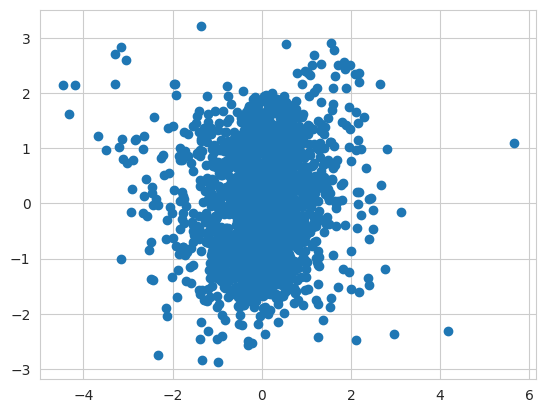

[-196.9558066]


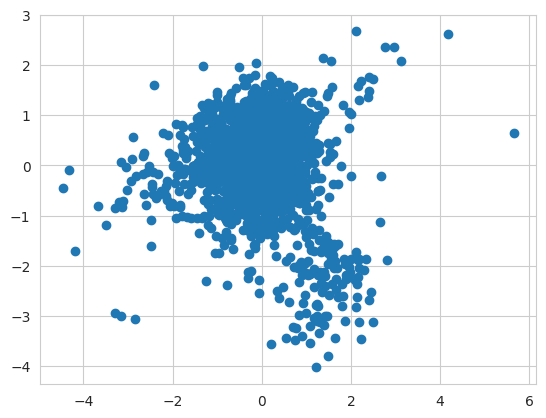

[-2.05247694]


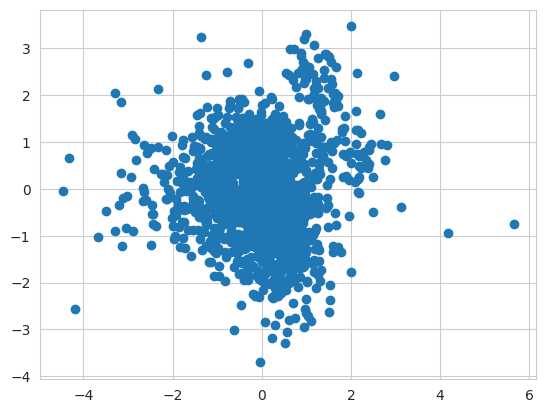

[28.7831732]


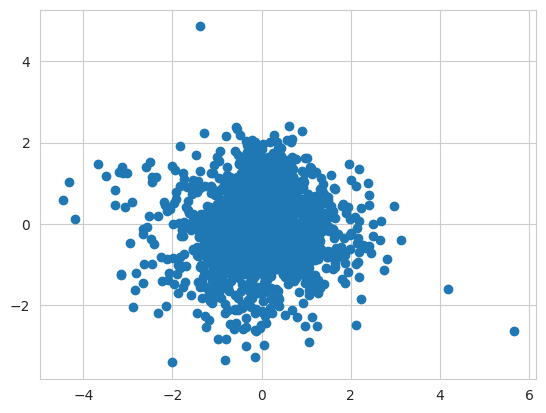

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[-115.08457582]


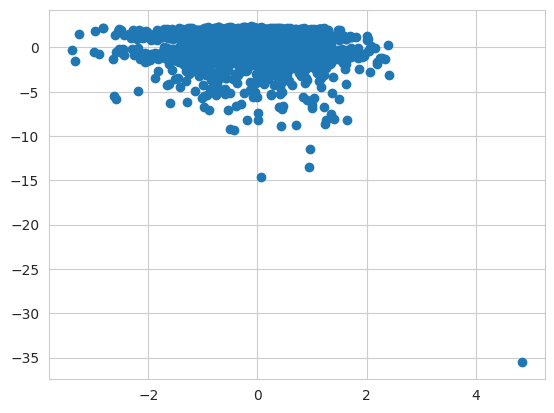

[-96.19909675]


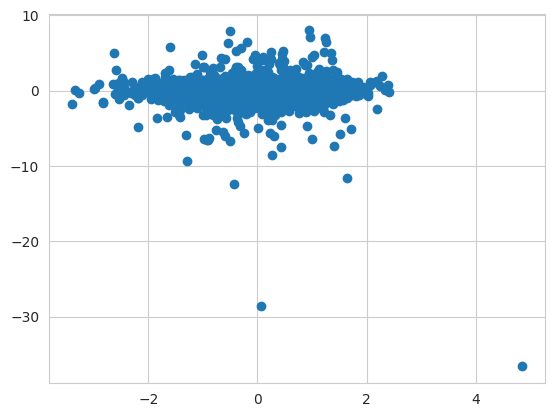

[-62.58092231]


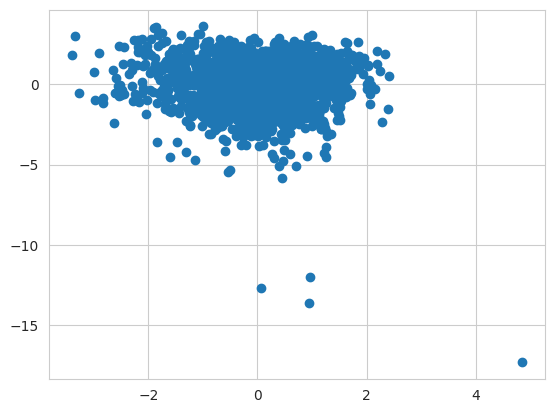

[-42.25233341]


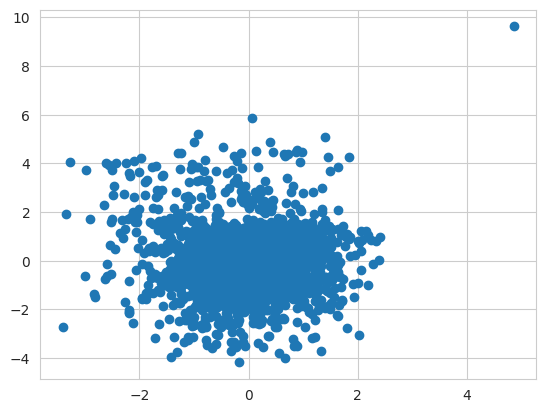

[-149.13875642]


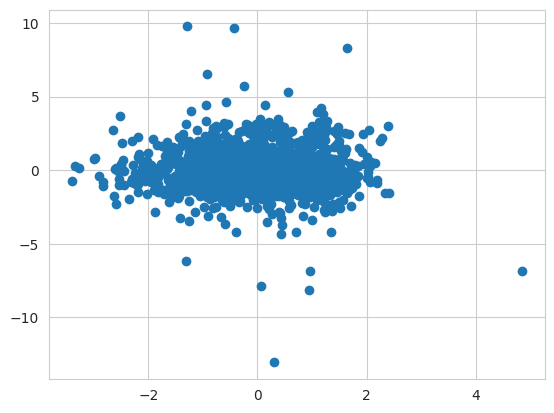

[-56.00034586]


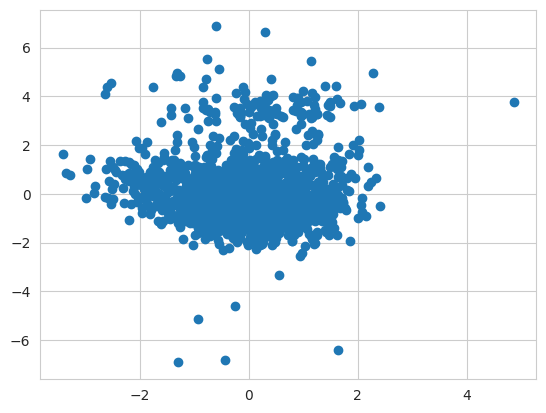

[-11.36779581]


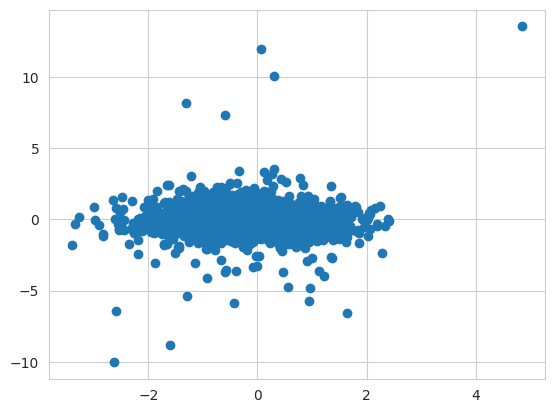

[128.30912934]


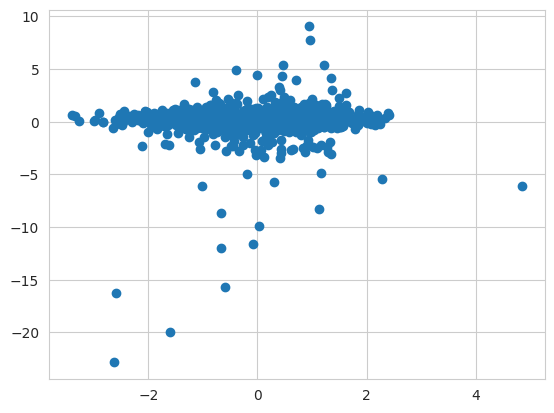

[14.21389171]


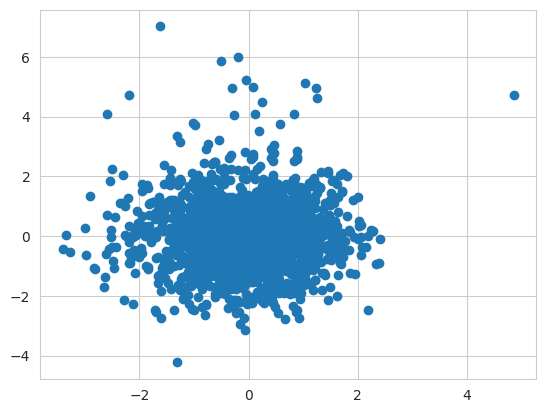

[9.15470097]


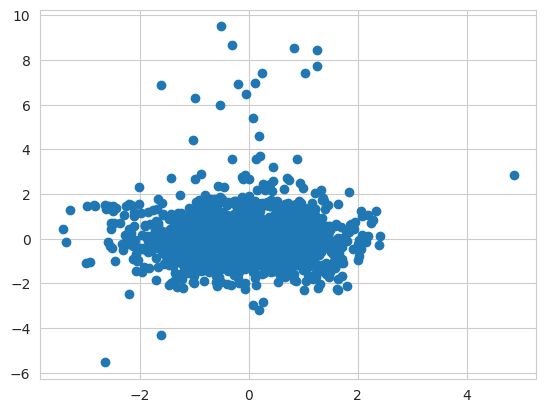

[-36.73137614]


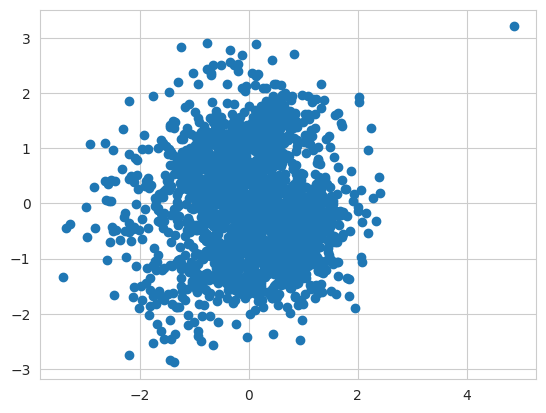

[-28.91373844]


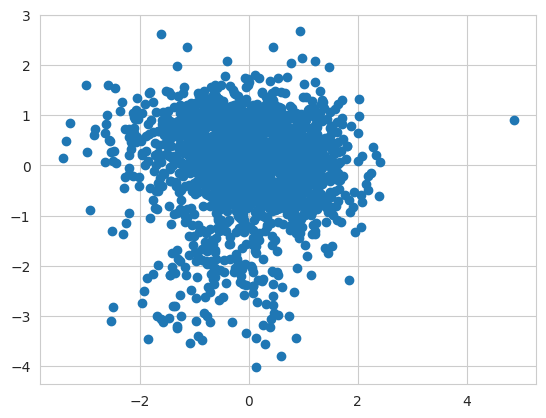

[9.51708367]


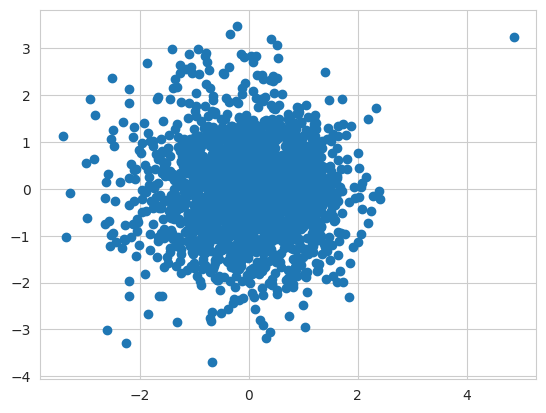

[28.7831732]


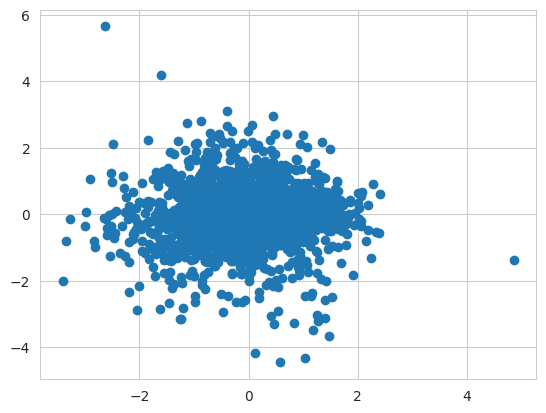

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan

In [ ]:
# for col1 in X:
#   for col2 in X:
#     if col1!=col2:
#       r = np.correlate(X[col1], X[col2])
#       print(r)
#       if np.abs(r) >= 0.35:
#         plt.scatter(X[col1], X[col2])
#         plt.show()

In [ ]:
#define loss function

def fraud_loss(amounts, y_pred, y_true):

  if not (len(y_pred) == len(y_true) and len(y_pred) == len(amounts)):
    raise ValueError("The three arrays must be of the same length")
  y_pred = list(y_pred)
  y_true = list(y_true)
  amounts = list(amounts)
  L = len(y_pred)
  abandoned_transactions = 0
  FN = 0


  for i in range(len(y_pred)):
    if y_pred[i] == 0:
      L -= 1
      if y_true[i] == 1:
        L += amounts[i]
        FN += 1
        print(f"False negative!! Loss = {L}")

    if y_pred[i] == 1:
      abandoned_transactions += 1

  FP = abandoned_transactions - sum(y_true) + FN

  abandonment_rate = .2*abandoned_transactions/len(y_pred)
  if abandonment_rate > .1:
    L += 10000*(abandonment_rate*100-10)
    print(f"Abandonment rate above 10% by {abandonment_rate*100-10:.2f} percentage points\nNew Loss = {L}")

  return L, FP, FN


(131593, 29) (32899, 29) (131593,) (32899,)
Isolation Forest Done!
LOF Fitting Done!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


LOF Done!
iso
 1    32490
-1      409
Name: count, dtype: int64
lof
 1    32460
-1      439
Name: count, dtype: int64
False negative!! Loss = 32872.89
False negative!! Loss = 32746.88
False negative!! Loss = 32666.84
False negative!! Loss = 32969.84
False negative!! Loss = 32859.78999999999
False negative!! Loss = 33478.60999999999
False negative!! Loss = 33467.60999999999
False negative!! Loss = 33451.479999999996
False negative!! Loss = 33314.259999999995
False negative!! Loss = 33321.149999999994
False negative!! Loss = 33229.939999999995
False negative!! Loss = 32822.939999999995
False negative!! Loss = 32676.169999999995
False negative!! Loss = 32522.969999999994
False negative!! Loss = 32391.729999999992
False negative!! Loss = 32319.999999999993
False negative!! Loss = 32842.189999999995
False negative!! Loss = 32888.13999999999
False negative!! Loss = 34966.13999999999
False negative!! Loss = 34940.65999999999
False negative!! Loss = 36032.65999999999
False negative!! Loss = 36

<Figure size 640x480 with 0 Axes>

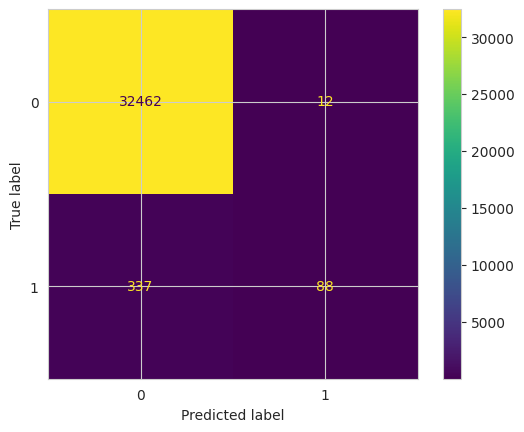

425


In [ ]:
#Hippie method (tree)
clean_df = df[df.notna().all(axis = 1)]

y = clean_df["target"]
X = clean_df.drop("target", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


iso = IsolationForest(contamination = sum(y_train)/len(y_train), random_state = 42)
y_train_iso = iso.fit_predict(X_train)
y_test_iso = iso.predict(X_test)
print("Isolation Forest Done!")

lof = LocalOutlierFactor(n_neighbors=20, contamination= sum(y_train)/len(y_train), novelty = True)
lof.fit(X_train)
print("LOF Fitting Done!")
y_train_lof = lof.predict(X_train)
y_test_lof = lof.predict(X_test)
print("LOF Done!")

X_train["iso"] = y_train_iso
X_test["iso"] = y_test_iso
print(X_test["iso"].value_counts())

X_train["lof"] = y_train_lof
X_test["lof"] = y_test_lof
print(X_test["lof"].value_counts())

naive_pipe = Pipeline(
    [("scaler", StandardScaler()),
     ("logistic regression", LogisticRegression())])

naive_pipe.fit(X_train, y_train)
y_pred = naive_pipe.predict(X_test)
print(fraud_loss(X_test["Amount"], y_pred, y_test))

plt.figure()
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_pred)
plt.show()

print(y_test.sum())


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
Name: target, Length: 2011, dtype: float64
(1608, 29) (403, 29) (1608,) (403,)
False positive!! Loss = 283.01
False positive!! Loss = 772.01
(720.01, 2, 2.0)


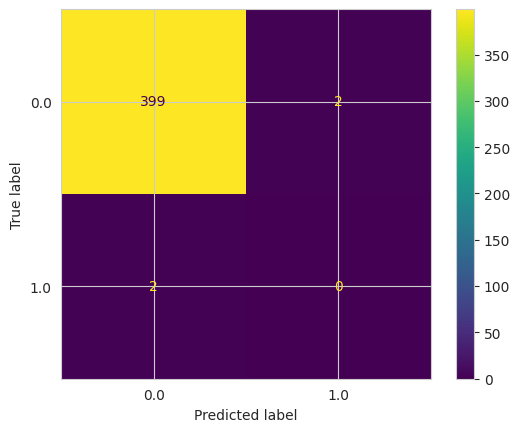

In [ ]:
#naive logistic regression approach (no stratified splitting)

clean_df = df[df.notna().all(axis = 1)]

y = clean_df["target"]
X = clean_df.drop("target", axis = 1)

print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

naive_pipe = Pipeline(
    [("scaler", StandardScaler()),
     ("logistic regression", LogisticRegression())])

naive_pipe.fit(X_train, y_train)
y_pred = naive_pipe.predict(X_test)
print(fraud_loss(X_test["Amount"], y_pred, y_test))

ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_pred)
plt.show()

In [ ]:
"""TODO: (GradientBoostingClassifier)
1) identify parent function of GBC
2) EITHER : Modify loss to match new one OR modify "criterion"
2.1) based on what you modified, decide whether to use validation dataset or not
3) OPTIMISE : learning_rate (0.0-inf, like .2)
4) OPTIMISE : subsample (<1)
5) OPTIMISE : n_estimators
6) if overfitting, OPTIMISE : min_samples_leaf
7) fit() and predict()
8) score(X, y) can be used for accuracy on data and true labels
"""


In [ ]:
#let's try the same, but adding some extra variables like |val|

